In [ ]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import itertools
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, recall_score
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
# mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the CSV file into a Pandas DataFrame
file_path = "/content/drive/MyDrive/Data_Mining_Coursework/Employee_Attrition.csv"
df = pd.read_csv(file_path, encoding='utf-8')

In [ ]:
# Making a copy of df for later use
new_df = df.copy()

In [ ]:
# Data quality check / looking for NaN
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
# check for missing values
if df.isnull().values.any():
    print("DataFrame contains missing values")
else:
    print("DataFrame does not contain missing values")

DataFrame does not contain missing values


***Performing EDA***

---



---



In [ ]:
# Check the shape of the dataset
df.shape

(1470, 35)

In [ ]:
# Check the data types of each column using the
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [ ]:
df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

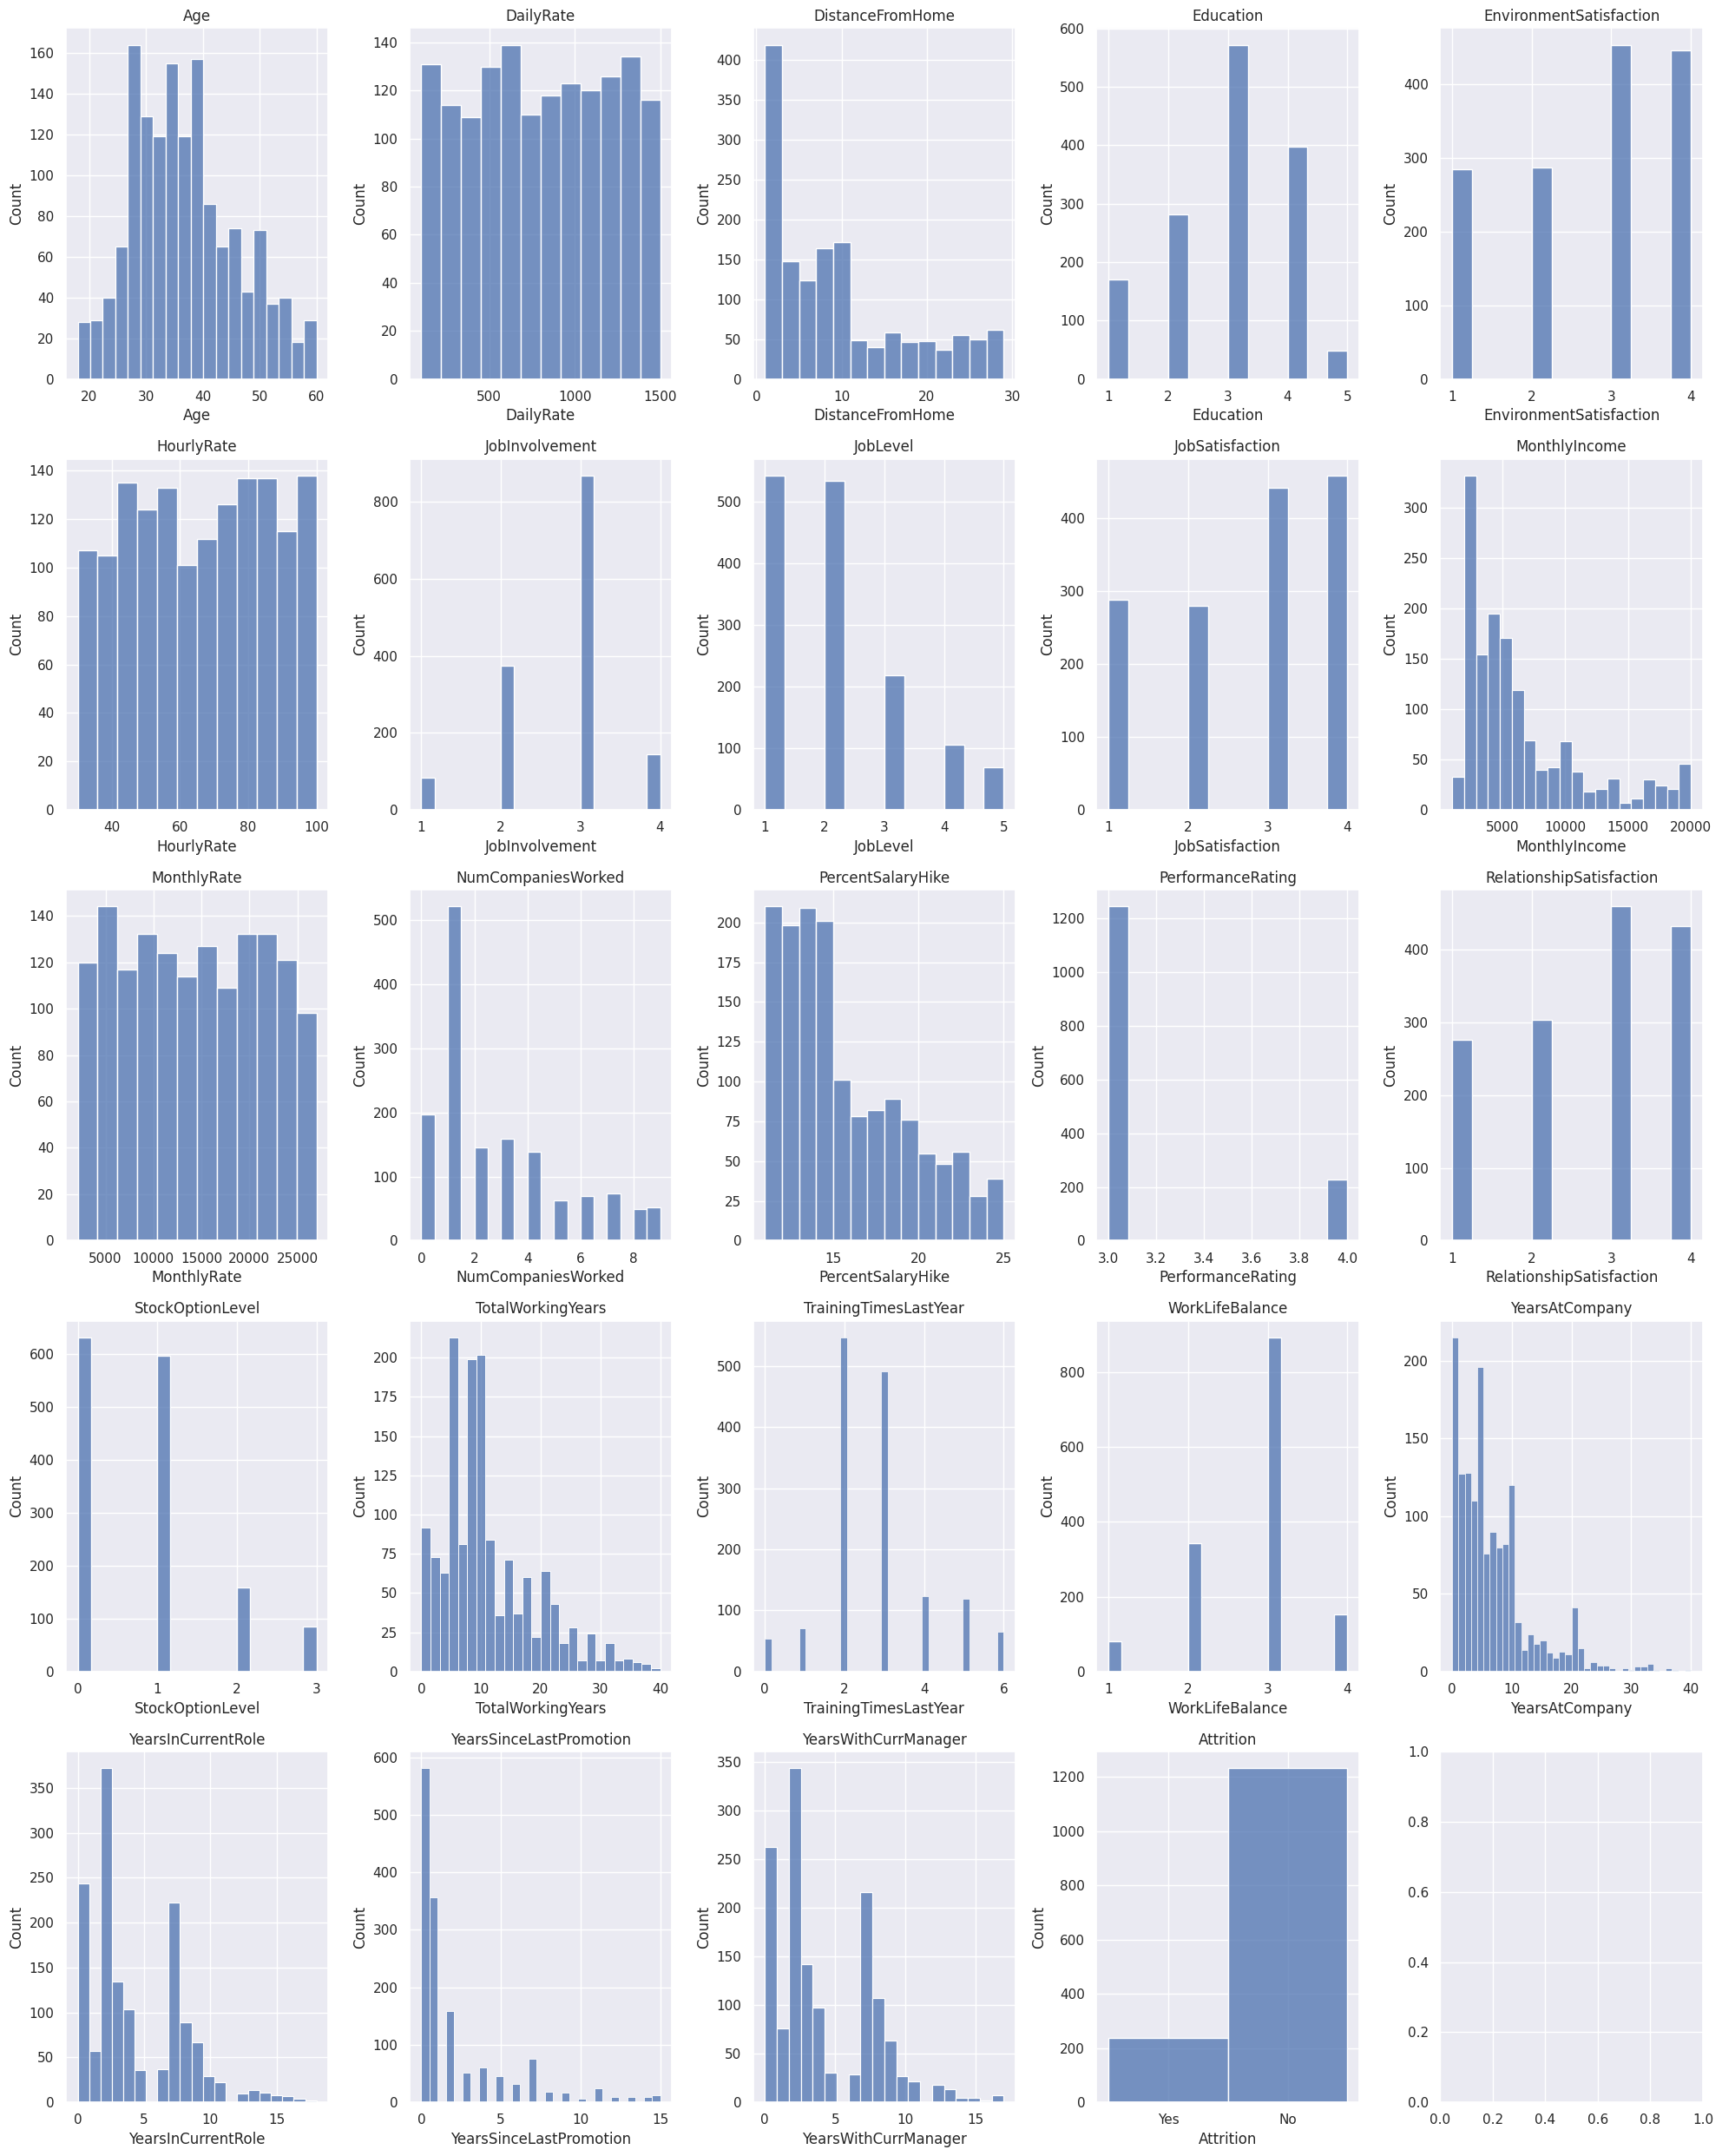

In [ ]:
# plot histograms of numerical features
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

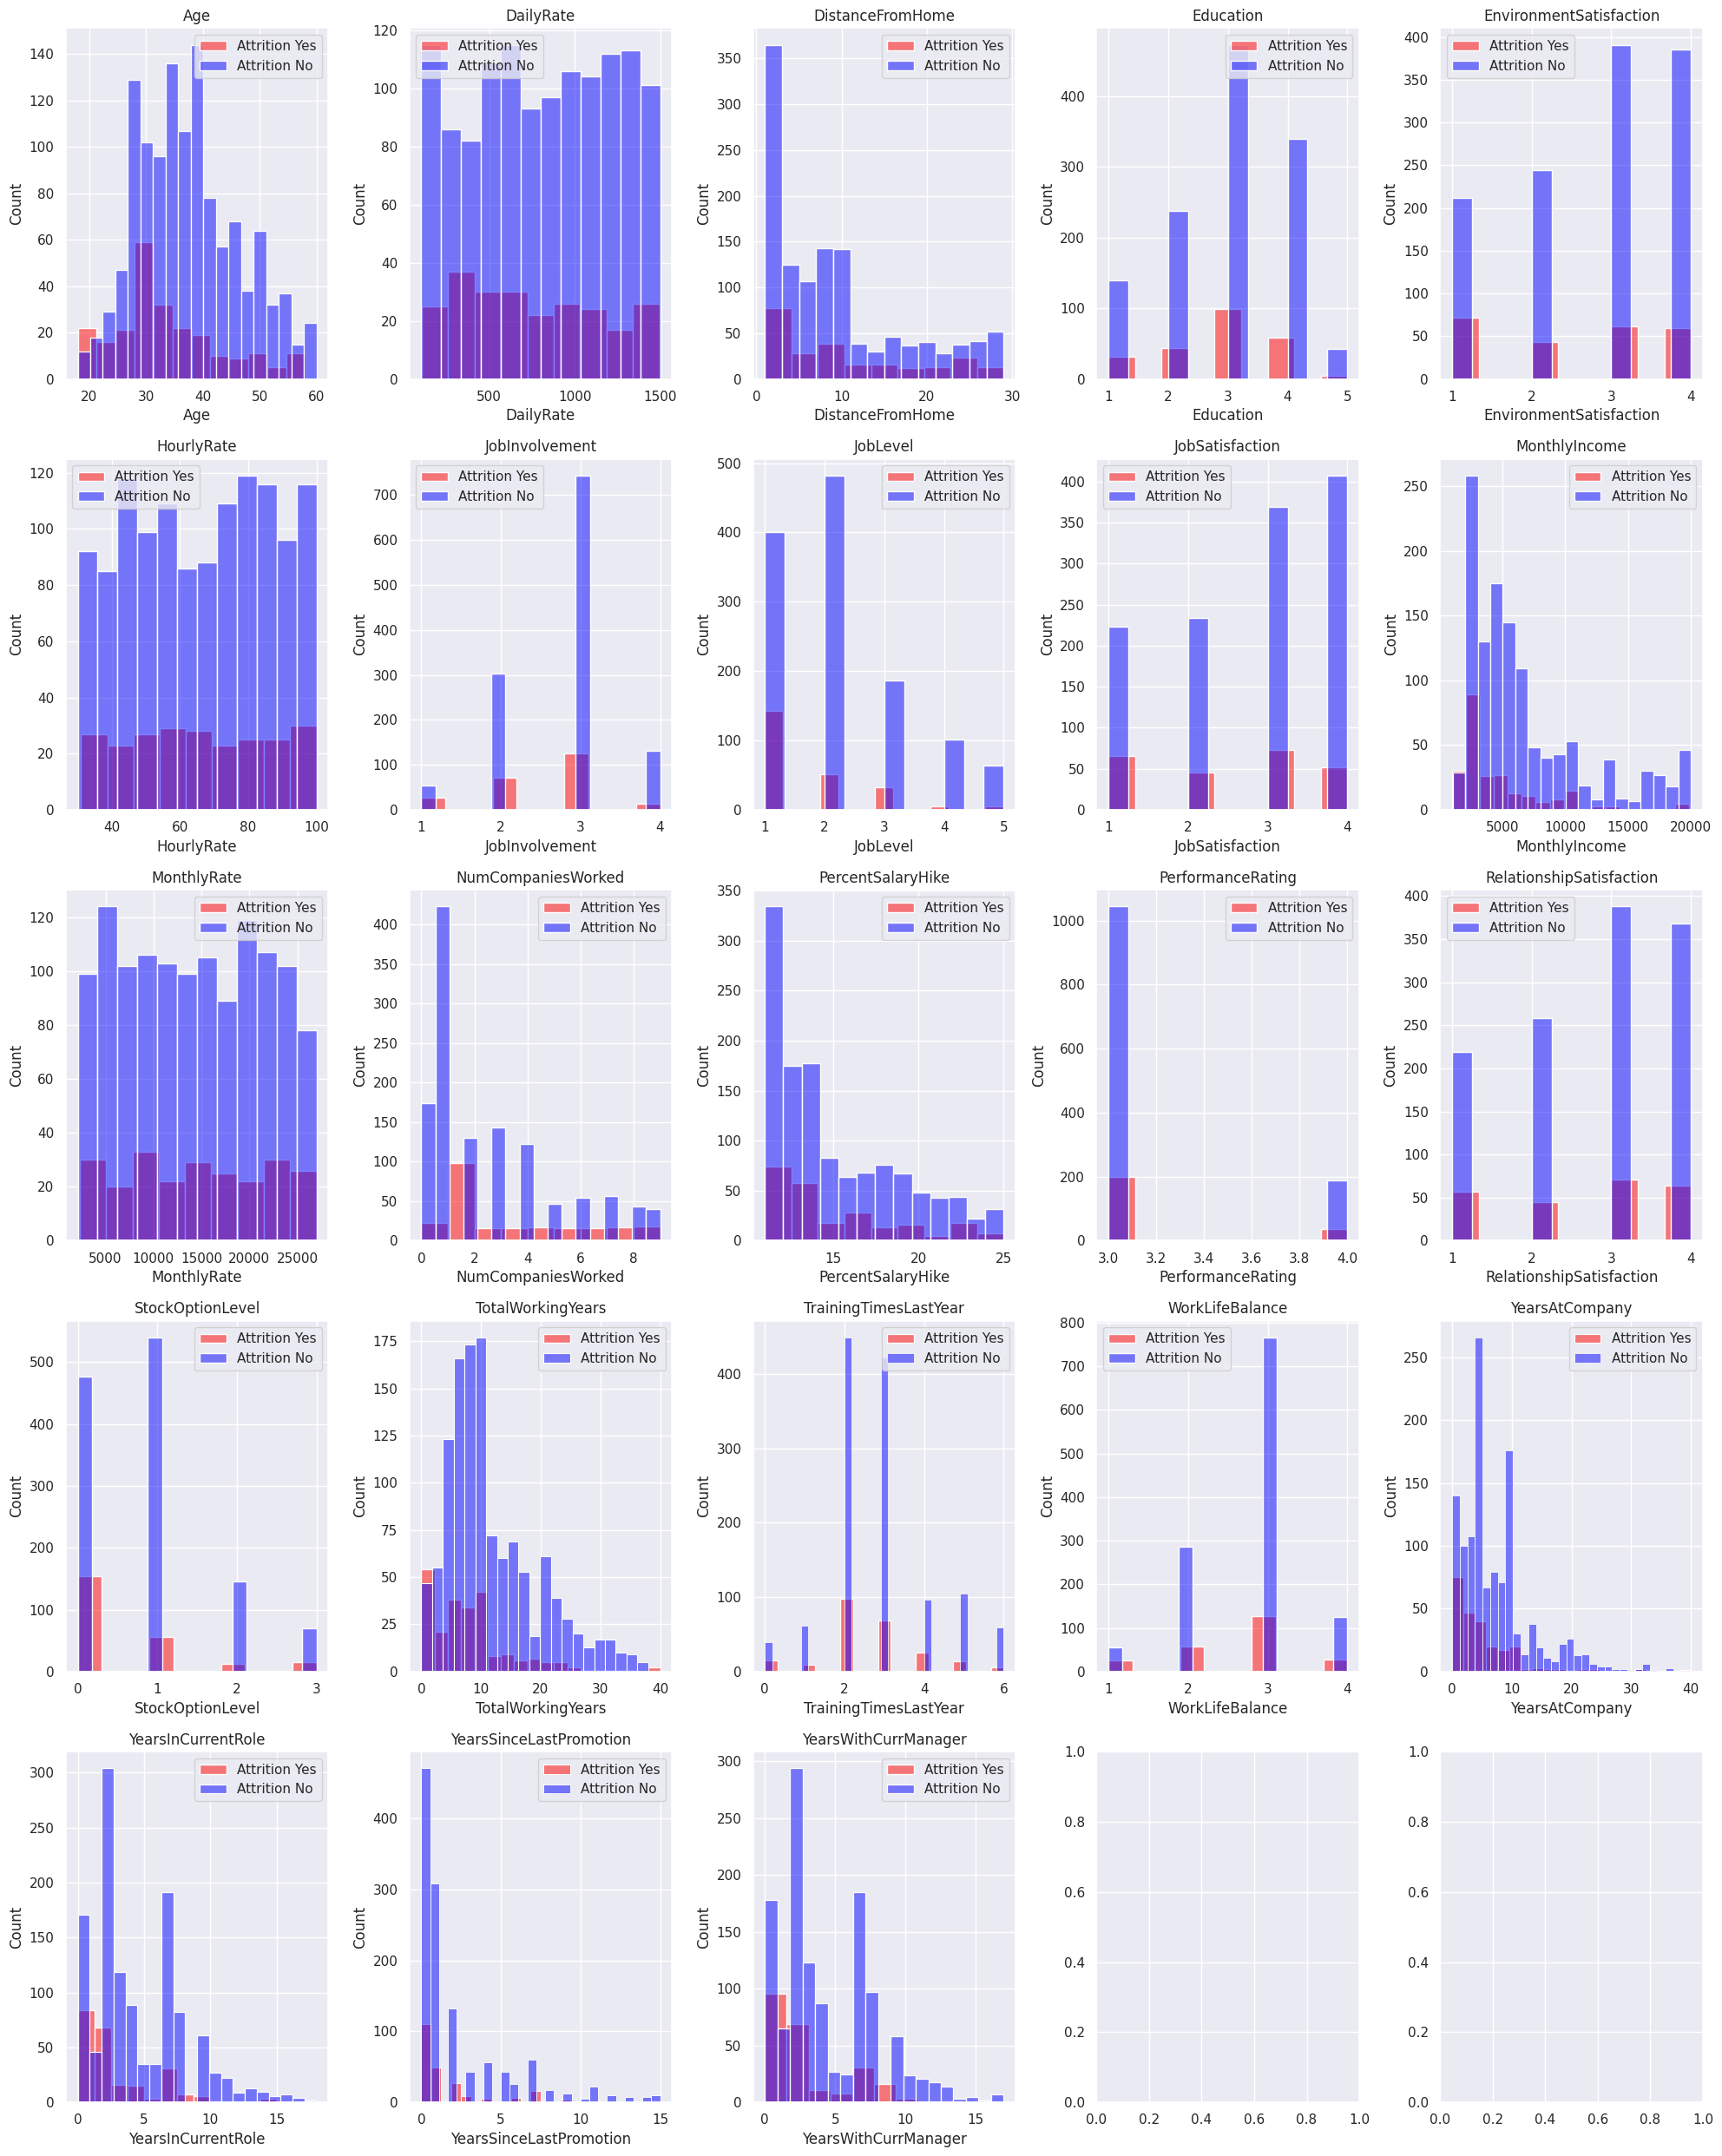

In [ ]:
# separate records with 'Attrition' = Yes and 'Attrition' = No
attr_yes = df[df['Attrition'] == 'Yes']
attr_no = df[df['Attrition'] == 'No']

# plot histograms of numerical features for 'Attrition' = Yes in red
# and 'Attrition' = No in blue
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(attr_yes[col], ax=axes[i], color='red', alpha=0.5, label='Attrition Yes')
    sns.histplot(attr_no[col], ax=axes[i], color='blue', alpha=0.5, label='Attrition No')
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()



In [ ]:
# Get the number of unique values for each column
unique_counts = df.nunique()

# Identify columns with only one unique value
to_drop = [col for col in unique_counts.index if unique_counts[col] == 1]

# Add the EmployeeNumber column to the list of columns to drop
to_drop.append('EmployeeNumber')

# Drop the columns
df.drop(to_drop, axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
print(to_drop)

['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']


In [ ]:
# Select only the numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

print(num_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
count = len(num_cols)
print(count)

23


In [ ]:
# create an empty list to store the object columns
object_col = []

# iterate through all columns in the DataFrame
for column in df.columns:
    # check if the column's data type is 'object' and if the number of unique values is less than or equal to 30
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        # if the condition is met, add the column to the list of object columns
        object_col.append(column)
        # print the unique values and their counts for the column
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [ ]:
# Creating a list of categorical attributes
cat_cols = df.select_dtypes(include='object').columns.tolist()

print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
# I excluded the target variable "Attrition"
cat_cols = [ 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

I also add to the list of categorical attribute those with inherent order

In [ ]:
# Appending another 11 attributes to the cat_cols list
cat_cols1 = ['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
for x in cat_cols1:
  cat_cols.append(x)

In [ ]:
print(cat_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


In [ ]:
# List of numerical attributes to be scaled
num_at_scale = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the numerical attributes
df[num_at_scale] = scaler.fit_transform(df[num_at_scale])

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  0.446350       Yes      Travel_Rarely   0.742527                   Sales   
1  1.322365        No  Travel_Frequently  -1.297775  Research & Development   
2  0.008343       Yes      Travel_Rarely   1.414363  Research & Development   
3 -0.429664        No  Travel_Frequently   1.461466  Research & Development   
4 -1.086676        No      Travel_Rarely  -0.524295  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0         -1.010909          2  Life Sciences                        2   
1         -0.147150          1  Life Sciences                        3   
2         -0.887515          2          Other                        4   
3         -0.764121          4  Life Sciences                        4   
4         -0.887515          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0         -0.421642                      0               1       -0.164613   
1         -0.164511                      3               3        0.488508   
2         -0.550208                      3               3       -1.144294   
3         -0.421642                      3               3        0.161947   
4         -0.678774                      3               3       -0.817734   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0           -0.063296                -0.679146             0.245834  
1            0.764998                -0.368715             0.806541  
2           -1.167687                -0.679146            -1.155935  
3            0.764998                 0.252146            -1.155935  
4           -0.615492                -0.058285            -0.595227  

[5 rows x 31 columns]

<ipython-input-165-8763b421aa5e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

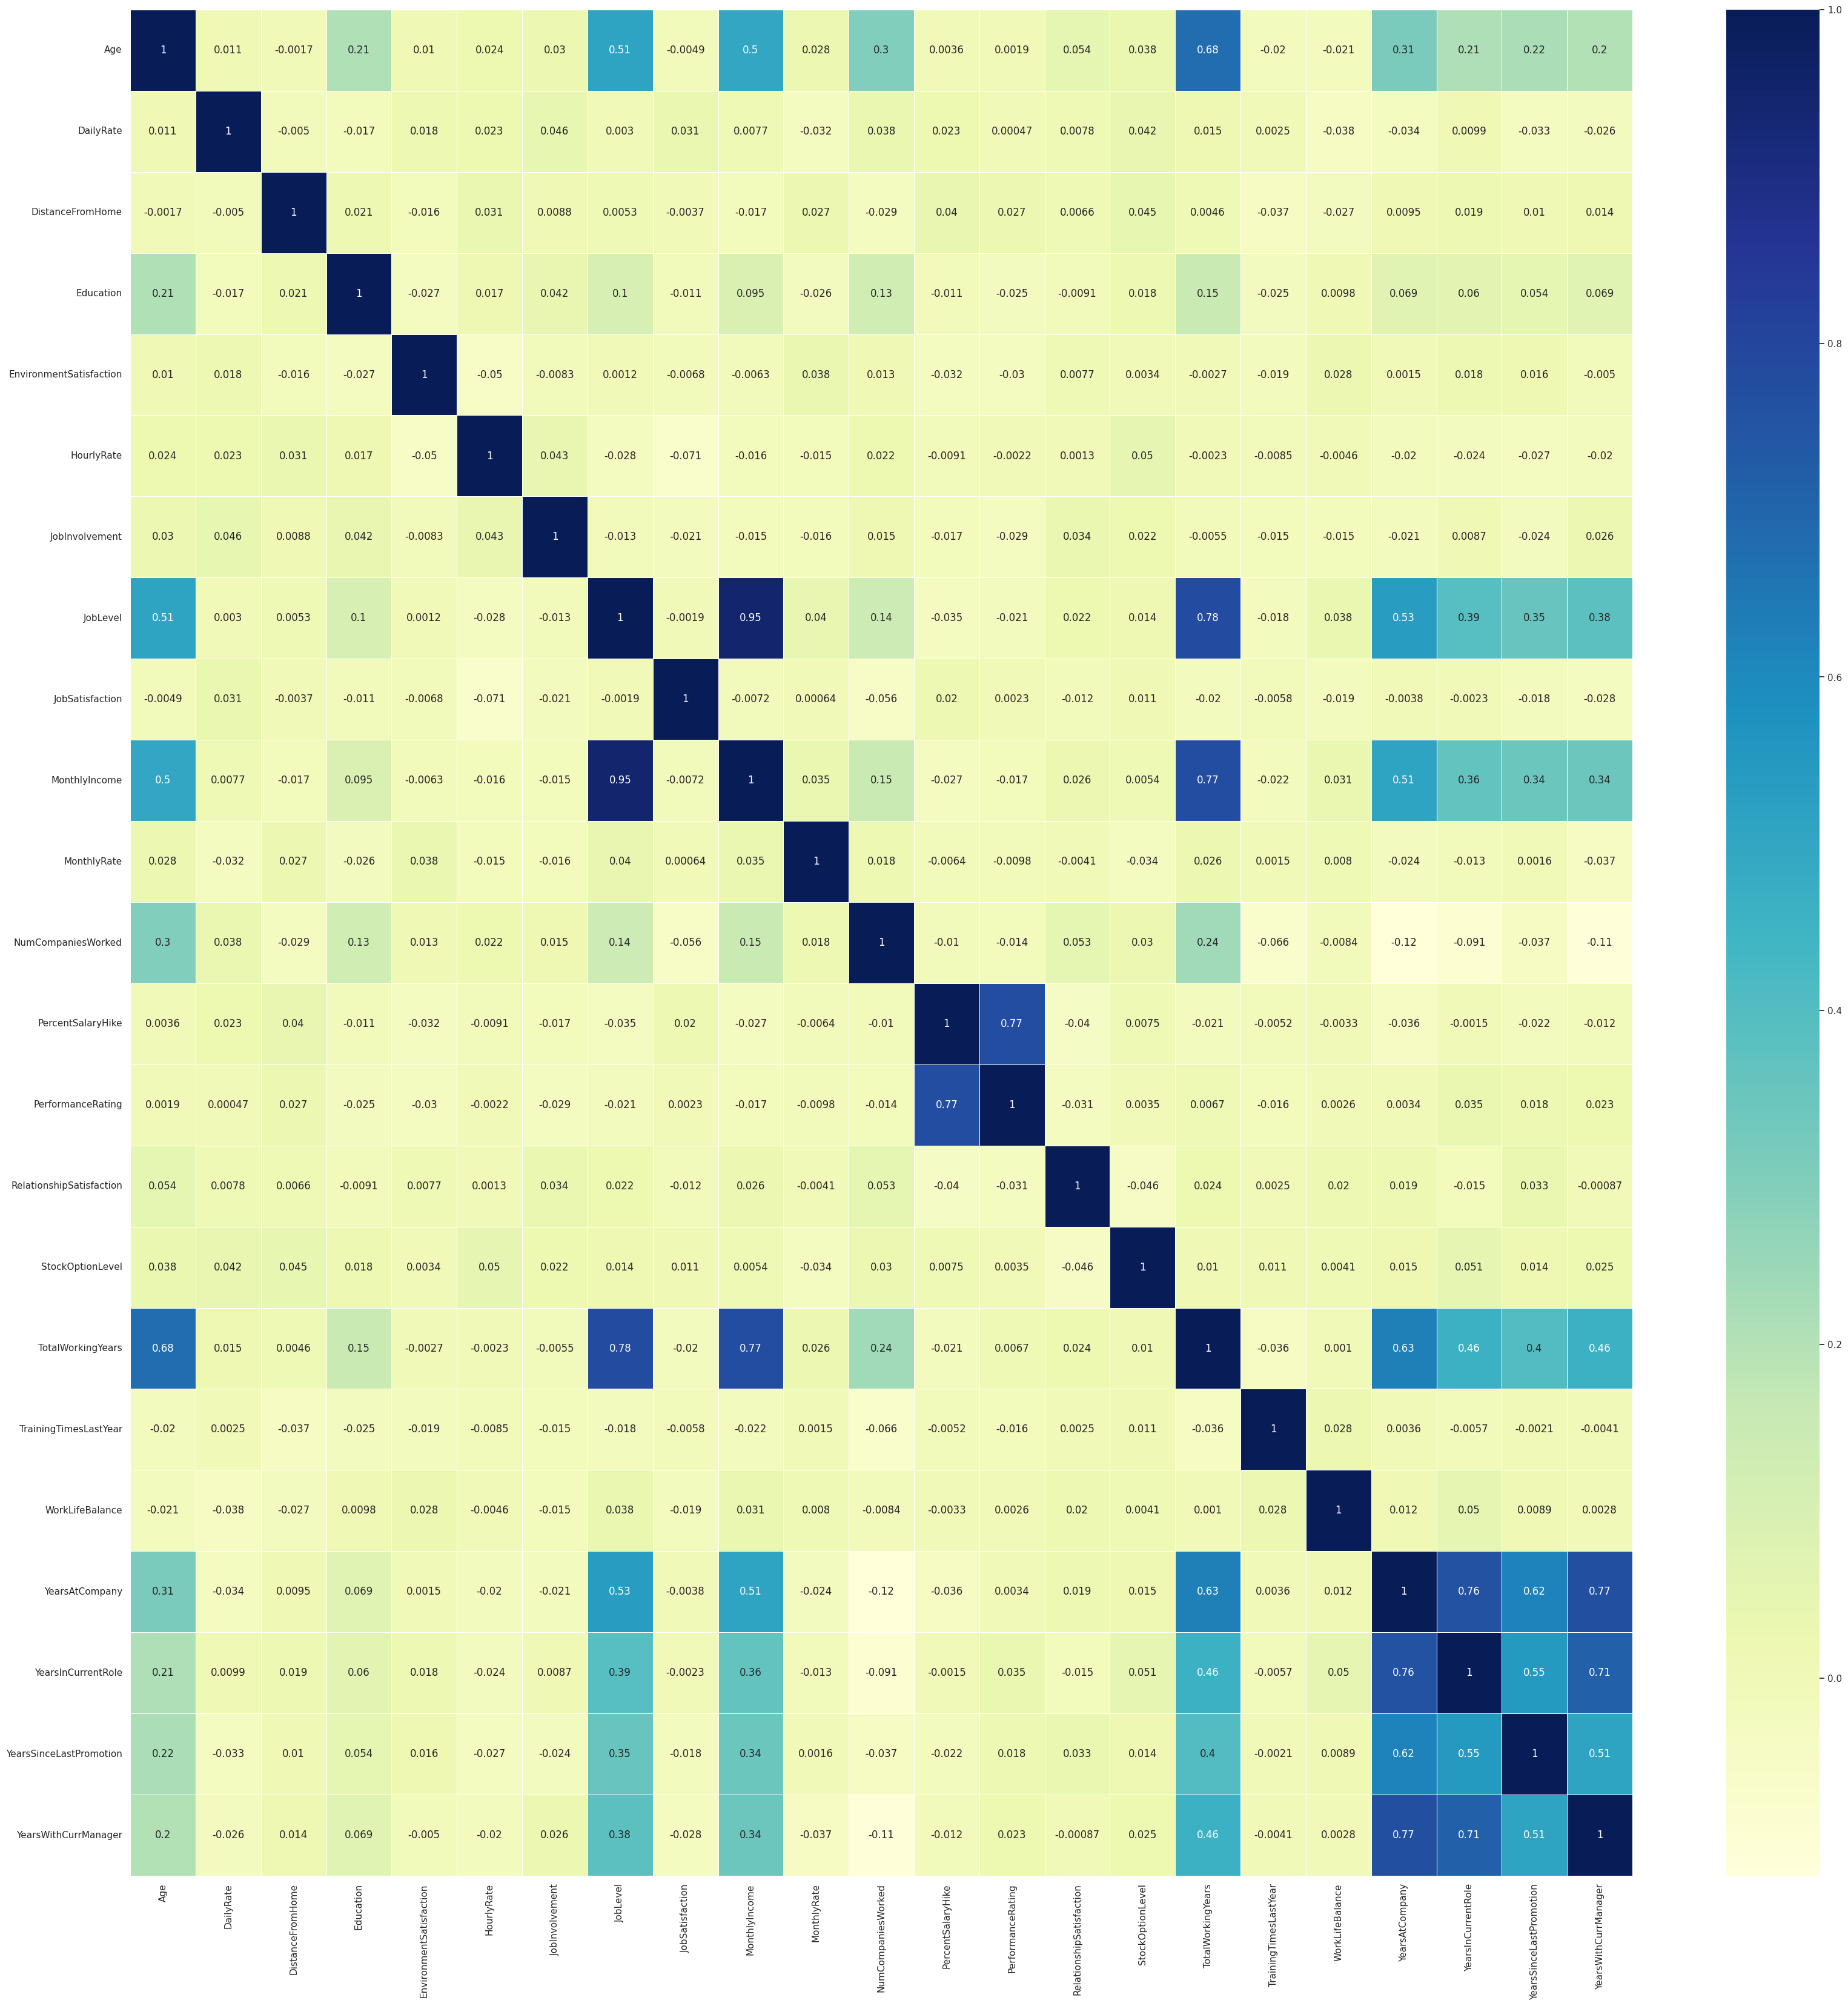

In [ ]:
# create a subset of the dataframe with only numerical columns
# num_df = df.select_dtypes(include=['int64', 'float64'])

# create a correlation matrix
corr_matrix = df.corr()

# plot the heatmap

plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, linewidths=.5)

In [ ]:
# assuming df is DataFrame with numerical features
corr_matrix = df.corr().abs()

# set diagonal elements to 0
np.fill_diagonal(corr_matrix.values, 0)

# get the indices of the maximum correlation value
idx = np.argmax(corr_matrix.values)

# get the corresponding attribute names
cols = corr_matrix.columns
max_corr = corr_matrix.values.flatten()[idx]
attr1, attr2 = np.unravel_index(idx, corr_matrix.shape)
attr1_name, attr2_name = cols[attr1], cols[attr2]

print(f"Highest correlation: {max_corr:.2f}")
print(f"Attributes: {attr1_name}, {attr2_name}")


Highest correlation: 0.95
Attributes: JobLevel, MonthlyIncome


<ipython-input-166-6d094c0b1de0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [ ]:
# One-hot encoding the chosen categorical attributes
df_one_hot= pd.get_dummies(df, columns=cat_cols)

In [ ]:
df_one_hot.head()

Age Attrition  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.446350       Yes   0.742527         -1.010909    1.383138      -0.108350   
1  1.322365        No  -1.297775         -0.147150   -0.240677      -0.291719   
2  0.008343       Yes   1.414363         -0.887515    1.284725      -0.937654   
3 -0.429664        No   1.461466         -0.764121   -0.486709      -0.763634   
4 -1.086676        No  -0.524295         -0.887515   -1.274014      -0.644858   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  ...  \
0     0.726020            2.125136          -1.150554          -0.421642  ...   
1     1.488876           -0.678049           2.129306          -0.164511  ...   
2    -1.674841            1.324226          -0.057267          -0.550208  ...   
3     1.243211           -0.678049          -1.150554          -0.421642  ...   
4     0.325900            2.525591          -0.877232          -0.678774  ...   

   TrainingTimesLastYear_1  TrainingTimesLastYear_2  TrainingTimesLastYear_3  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        1   
3                        0                        0                        1   
4                        0                        0                        1   

   TrainingTimesLastYear_4  TrainingTimesLastYear_5  TrainingTimesLastYear_6  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   WorkLifeBalance_1  WorkLifeBalance_2  WorkLifeBalance_3  WorkLifeBalance_4  
0                  1                  0                  0                  0  
1                  0                  0                  1                  0  
2                  0                  0                  1                  0  
3                  0                  0                  1                  0  
4                  0                  0                  1                  0  

[5 rows x 85 columns]

In [ ]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   object 
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   HourlyRate                         1470 non-null   float64
 5   MonthlyIncome                      1470 non-null   float64
 6   MonthlyRate                        1470 non-null   float64
 7   NumCompaniesWorked                 1470 non-null   float64
 8   PercentSalaryHike                  1470 non-null   float64
 9   TotalWorkingYears                  1470 non-null   float64
 10  YearsAtCompany                     1470 non-null   float64
 11  YearsInCurrentRole                 1470 non-null   float

In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Attrition' column
df_one_hot['Attrition'] = df_one_hot['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Calculate correlations with the target variable
correlations = df_one_hot.corr()['Attrition'].sort_values(ascending=False)
# Set max_rows to None to display the entire list
pd.set_option('display.max_rows', None)
# Print correlations
print(correlations)

Attrition                            1.000000
OverTime_Yes                         0.246118
JobLevel_1                           0.212551
StockOptionLevel_0                   0.195342
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
EnvironmentSatisfaction_1            0.122819
JobInvolvement_1                     0.117161
BusinessTravel_Travel_Frequently     0.115143
WorkLifeBalance_1                    0.098689
JobRole_Laboratory Technician        0.098290
JobSatisfaction_1                    0.090329
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
TrainingTimesLastYear_0              0.061894
RelationshipSatisfaction_1           0.059222
EducationField_Marketing             0.055781
JobInvolvement_2                     0.044731
NumCompaniesWorked                   0.043494
TrainingTimesLastYear_4              0.041216
TrainingTimesLastYear_2           

In [ ]:
# Separating independent and dependent attributes
X = df_one_hot.drop(['Attrition'], axis = 1)
y = df_one_hot['Attrition']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 84 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   HourlyRate                         1470 non-null   float64
 4   MonthlyIncome                      1470 non-null   float64
 5   MonthlyRate                        1470 non-null   float64
 6   NumCompaniesWorked                 1470 non-null   float64
 7   PercentSalaryHike                  1470 non-null   float64
 8   TotalWorkingYears                  1470 non-null   float64
 9   YearsAtCompany                     1470 non-null   float64
 10  YearsInCurrentRole                 1470 non-null   float64
 11  YearsSinceLastPromotion            1470 non-null   float

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


MODEL BUILDING

---



---



In [ ]:
# This will split the data into training and test sets, while ensuring that the proportion of the minority class is maintained in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


PERFORMING DATA AUGMENTATION

---



---



In [ ]:
# The target variable is heavily imbalanced, as observed earlier. To address this issue, we can utilize the SMOTE method from the imblearn package in Python to oversample the minority class.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


1. LOGISTIC REGRESSION

---



---



In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # create logistic regression model
# model = LogisticRegression(random_state=42, max_iter=1000)

# # define hyperparameters to search over
# hyperparameters = {'C': [0.01, 0.1, 1, 10],
#                    'penalty': [ 'l2', None],#,,'l1'
#                    'solver': ['lbfgs','saga',  'sag'],#
#                    'class_weight': [None, 'balanced']}

# # perform grid search cross-validation
# grid_search = GridSearchCV(model, hyperparameters, cv=5, n_jobs=-1)
# grid_search.fit(X_train_smote, y_train_smote)

# # print best hyperparameters
# print(grid_search.best_params_)

# # predict on test data using best model
# y_pred = grid_search.predict(X_test)

# # evaluate model performance on test data
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))


In [ ]:
# create logistic regression model
lr_smote = LogisticRegression(random_state=42, max_iter=1000, class_weight = 'balanced' )

# train model on resampled data
lr_smote.fit(X_train_smote, y_train_smote)

# predict on test data
y_pred_lr_smote = lr_smote.predict(X_test)

lr_smote_metrics = classification_report(y_test, y_pred_lr_smote)
# evaluate model performance on test data
print(classification_report(y_test, y_pred_lr_smote))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.70      0.49      0.57        47

    accuracy                           0.88       294
   macro avg       0.80      0.72      0.75       294
weighted avg       0.87      0.88      0.88       294



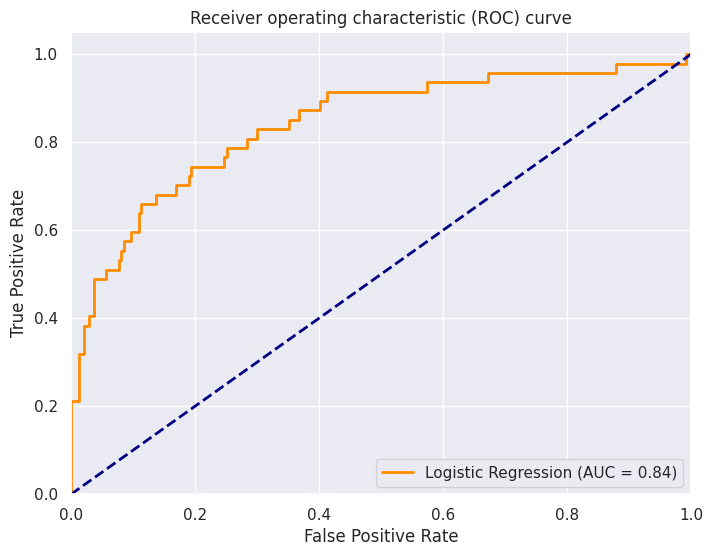

In [ ]:

# get predicted probabilities for positive class
y_score_lr_smote = lr_smote.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score_lr_smote)

# calculate AUC score
roc_auc = auc(fpr, tpr)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


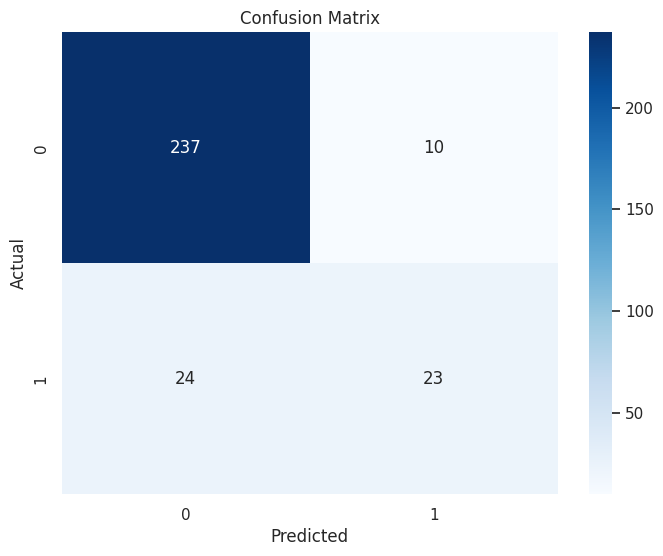

In [ ]:

# get predicted labels
y_pred_lr_smote = lr_smote.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



2. DECISION TREE CLASSIFIER

---



---



In [ ]:
# from sklearn.model_selection import GridSearchCV

# # create Decision Tree model
# dt_smote = DecisionTreeClassifier(random_state=42)

# # define hyperparameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced'],
#     'ccp_alpha': [0.0, 0.1, 0.01]
# }

# # perform grid search with 5-fold cross validation
# dt_smote_grid = GridSearchCV(dt_smote, param_grid, cv=5)

# # fit grid search on training data
# dt_smote_grid.fit(X_train_smote, y_train_smote)

# # predict on test data using best model
# y_pred = dt_smote_grid.predict(X_test)

# # evaluate model performance on test data
# dt_smote_metrics = classification_report(y_test, y_pred)
# print(dt_smote_metrics)

# # print best hyperparameters
# print("Best hyperparameters:", dt_smote_grid.best_params_)


In [ ]:
# create Decision Tree model
dt_smote = DecisionTreeClassifier(random_state=42, max_depth = 4,min_samples_leaf = 1, class_weight = 'balanced' )

# train model on resampled data
dt_smote.fit(X_train_smote, y_train_smote)

# predict on test data
y_pred_dt_smote = dt_smote.predict(X_test)

# evaluate model performance on test data
dt_smote_metrics = classification_report(y_test, y_pred_dt_smote)
print(dt_smote_metrics)


              precision    recall  f1-score   support

           0       0.90      0.87      0.88       247
           1       0.42      0.49      0.45        47

    accuracy                           0.81       294
   macro avg       0.66      0.68      0.67       294
weighted avg       0.82      0.81      0.82       294



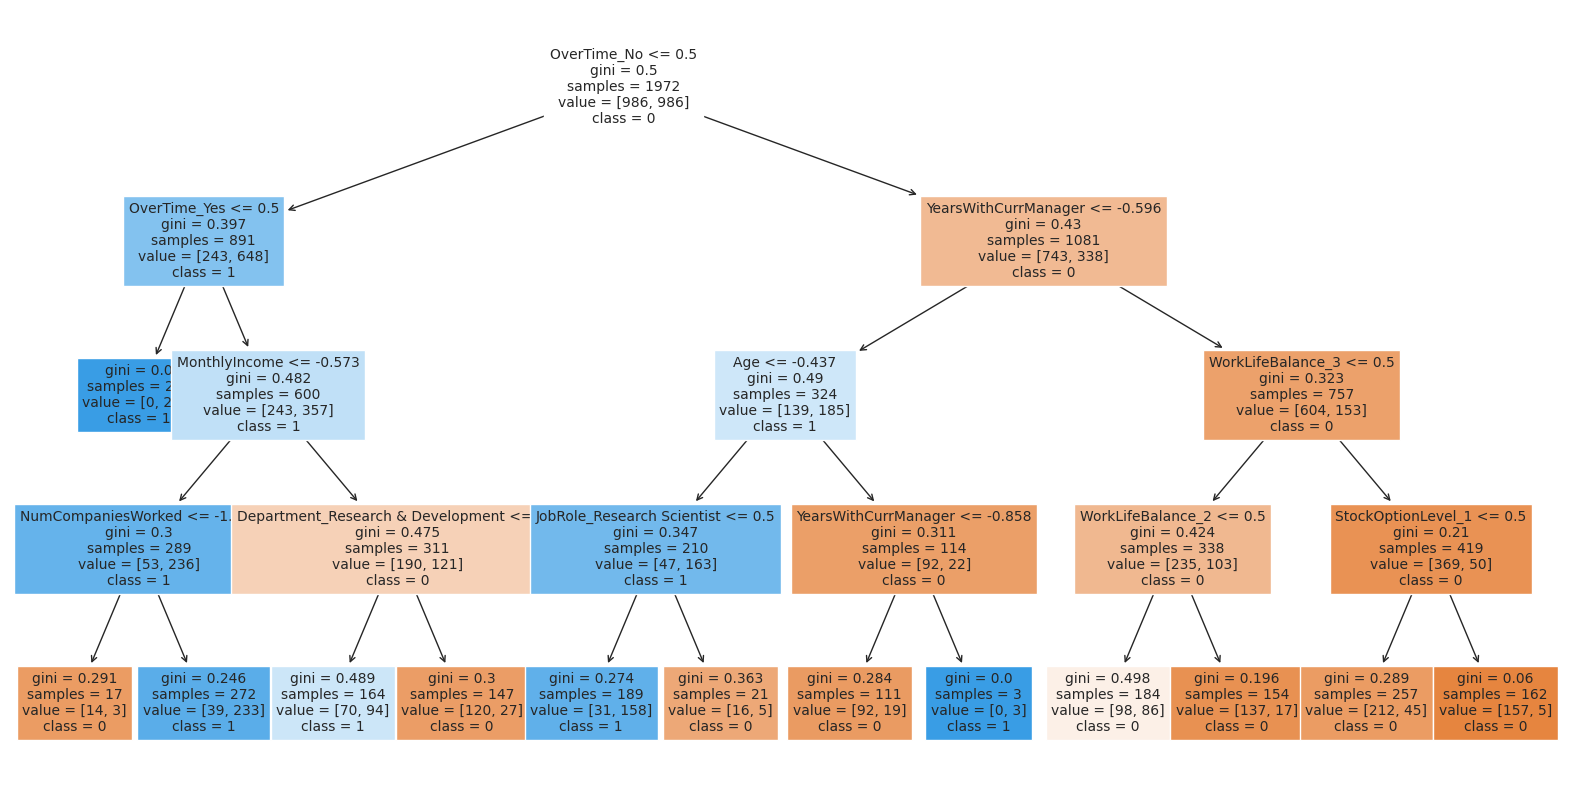

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_smote, filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize=10)
plt.show()


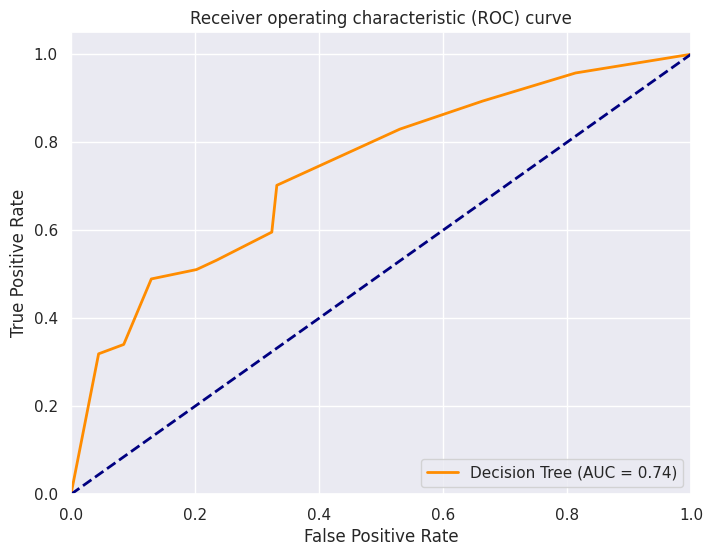

In [ ]:

# get predicted probabilities for positive class
y_prob_dt_smote = dt_smote.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_dt_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

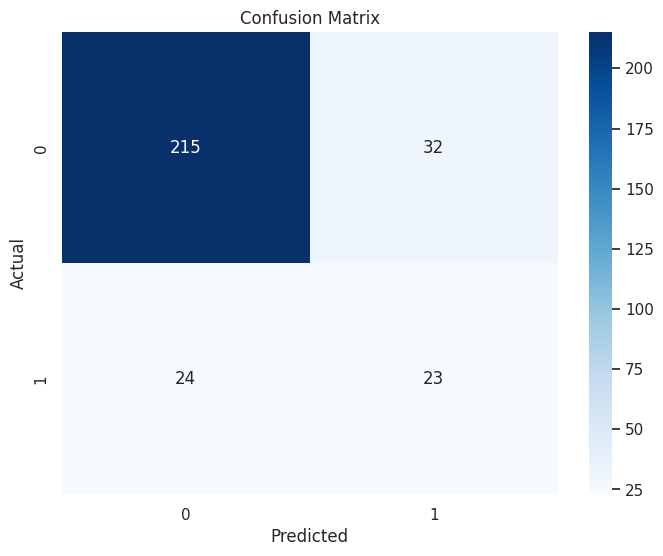

In [ ]:
# get predicted labels
y_pred_dt_smote = dt_smote.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


3. RANDOM FOREST

---



---



In [ ]:
# # create a random forest classifier
# rf = RandomForestClassifier(random_state=42)

# # define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [5, 10, 15, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # create the grid search object
# grid_rf = GridSearchCV(rf, param_grid, cv=5)


# # fit the grid search object to the data
# grid_rf.fit(X_train_smote, y_train_smote)

# # print the best parameters and the corresponding score
# print("Best parameters: ", grid_rf.best_params_)
# print("Best score: ", grid_rf.best_score_)


In [ ]:
# create Random Forest model
rf_smote = RandomForestClassifier(random_state=42, max_depth = 4, class_weight = 'balanced', n_estimators=100)

# train model on train data
rf_smote.fit(X_train_smote, y_train_smote)

# predict on test data
y_pred_rf_smote = rf_smote.predict(X_test)

rf_smote_metrics = classification_report(y_test, y_pred_rf_smote)
# evaluate model performance on test data
print(rf_smote_metrics)


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       247
           1       0.43      0.49      0.46        47

    accuracy                           0.81       294
   macro avg       0.66      0.68      0.67       294
weighted avg       0.82      0.81      0.82       294



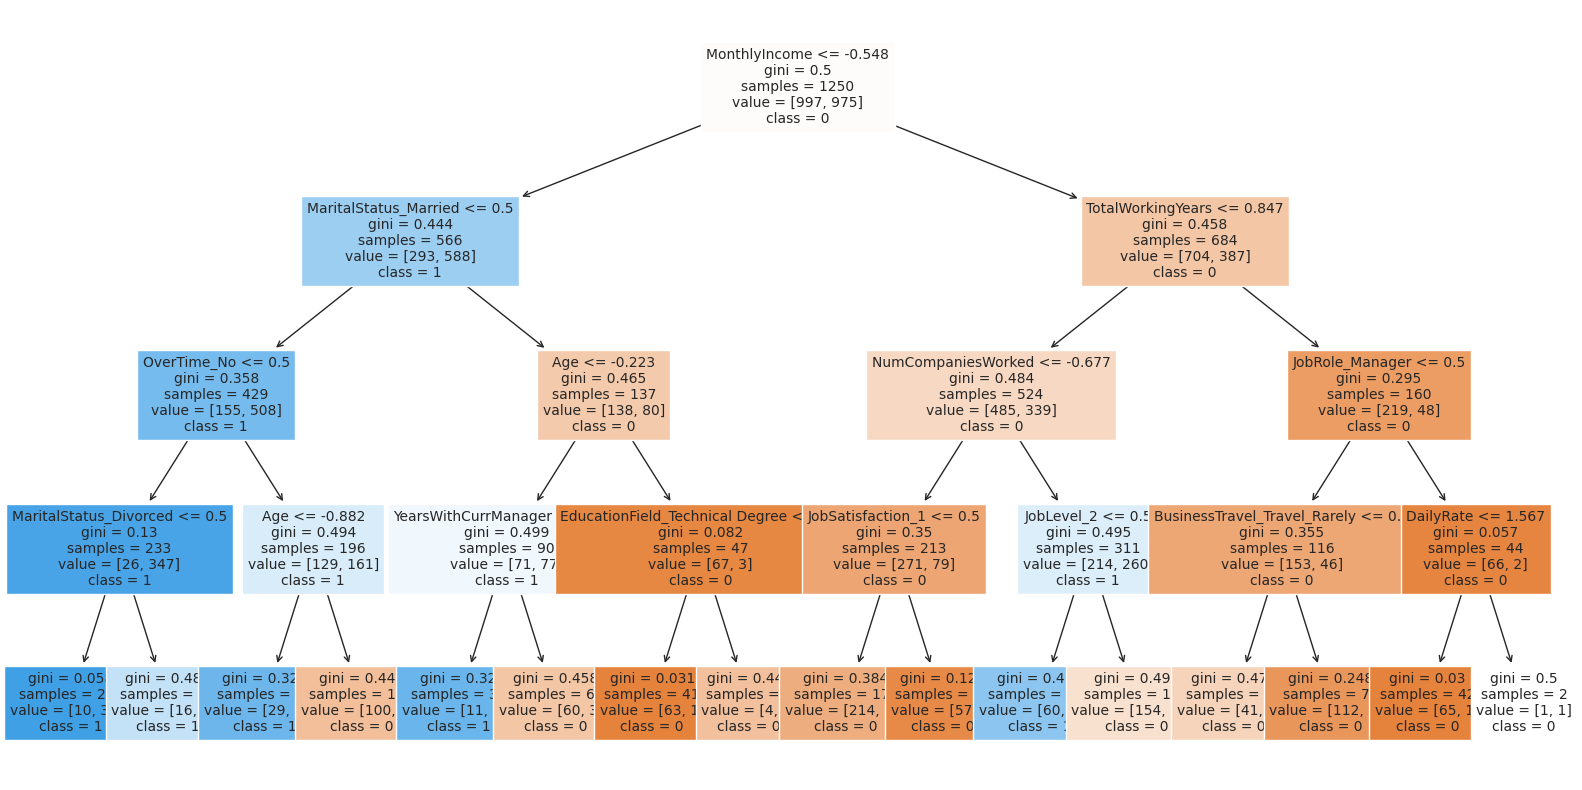

In [ ]:
# Plot the first tree in the random forest
plt.figure(figsize=(20, 10))
plot_tree(rf_smote.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], fontsize=10)
plt.show()

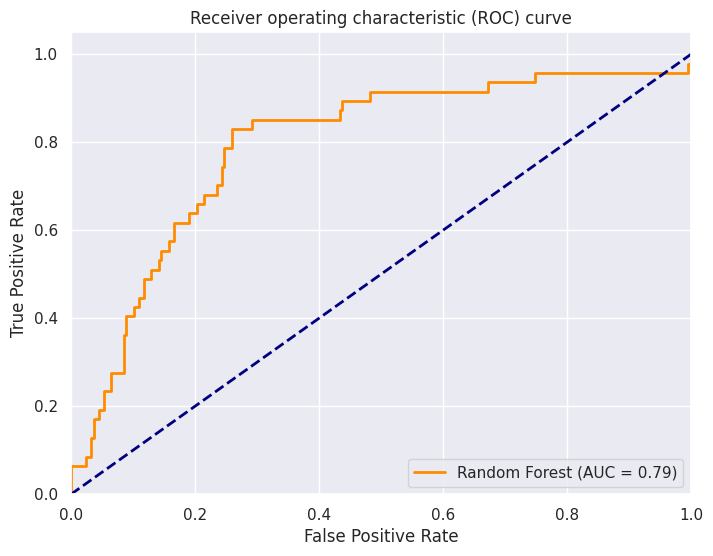

In [ ]:
# get predicted probabilities for positive class
y_prob_rf_smote = rf_smote.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_rf_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


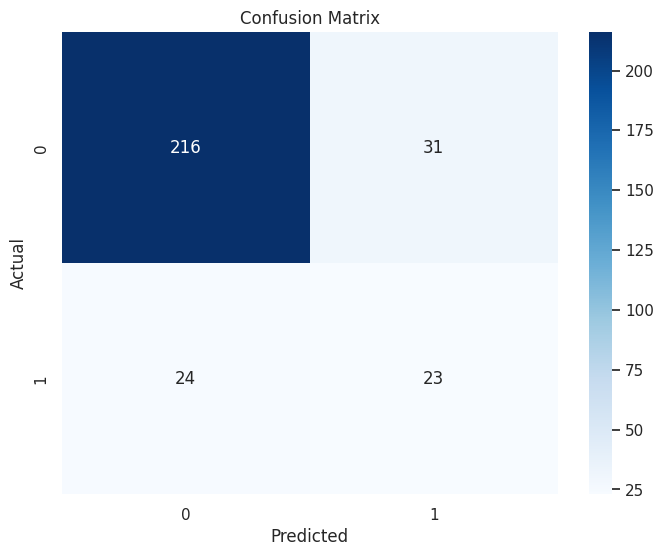

In [ ]:
# get predicted labels
y_pred_rf_smote = rf_smote.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


4.GRADIENT BOOSTING

---



---



In [ ]:

# # define the model
# model = GradientBoostingClassifier()

# # define the hyperparameter space to search
# param_dist = {'n_estimators': sp_randint(50, 200),
#               'max_depth': sp_randint(2, 10),
#               'min_samples_split': sp_randint(2, 10),
#               'min_samples_leaf': sp_randint(1, 10),
#               'learning_rate': [0.1, 0.01, 0.001]}

# # perform randomized search with 10 iterations
# random_search = RandomizedSearchCV(model, param_distributions=param_dist,
#                                    n_iter=10, cv=5, scoring='f1', random_state=42)

# # fit the randomized search object to the data
# random_search.fit(X_train_smote, y_train_smote)

# # print the best hyperparameters and corresponding f1 score
# print('Best hyperparameters:', random_search.best_params_)
# print('Corresponding f1 score:', random_search.best_score_)


In [ ]:
# Create Gradient Boosting Classifier
gb_smote = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_smote.fit(X_train_smote, y_train_smote)

# Predict the target variable for test data
y_pred_gb_smote = gb_smote.predict(X_test)

gb_smote_metrics = classification_report(y_test, y_pred_gb_smote)
# evaluate model performance on test data
print(gb_smote_metrics)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



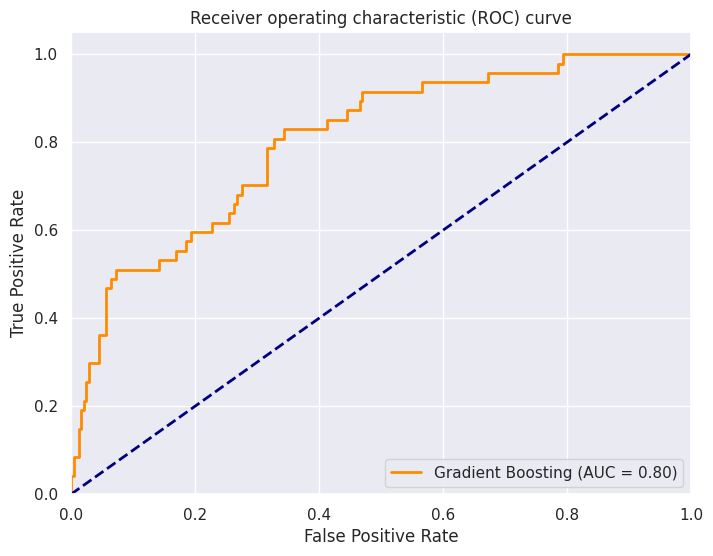

In [ ]:
# Get predicted probabilities for positive class
y_prob_gb_smote = gb_smote.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb_smote)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_gb_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


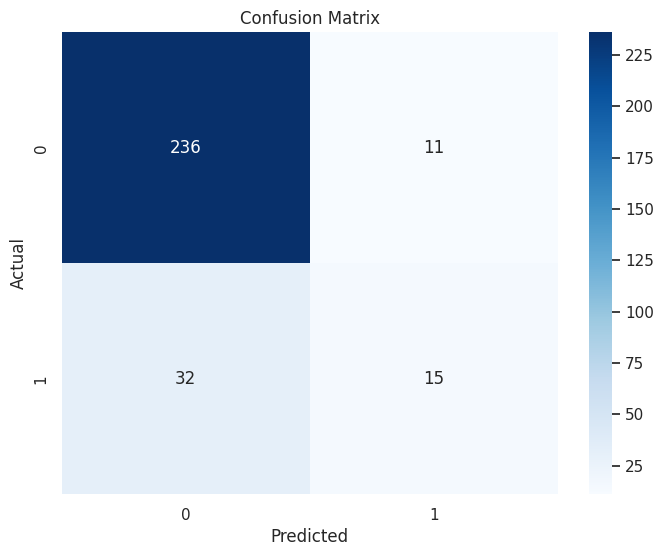

In [ ]:
# Get predicted labels
y_pred_gb_smote = gb_smote.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gb_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5. XGBoost CLASSIFIER

---



---



In [ ]:
# # import necessary libraries
# from sklearn.model_selection import GridSearchCV

# # define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.5, 0.7, 1]
# }

# # create XGBoost Classifier
# xgb_smote = xgb.XGBClassifier(random_state=42)

# # create GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_smote, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # fit the GridSearchCV object to the data
# grid_search.fit(X_train_smote, y_train_smote)

# # get the best hyperparameters and the corresponding score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # print the best hyperparameters and the corresponding score
# print('Best hyperparameters: ', best_params)
# print('Best score: ', best_score)

# # predict on test data using the best model
# best_xgb_smote = grid_search.best_estimator_
# y_pred = best_xgb_smote.predict(X_test)

# # evaluate model performance on test data
# xgb_smote_metrics = classification_report(y_test, y_pred)
# print(xgb_smote_metrics)


In [ ]:
# Create XGBoost Classifier
xgb_smote = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict the target variable for test data
y_pred_xgb_smote = xgb_smote.predict(X_test)

xgb_smote_metrics = classification_report(y_test, y_pred_xgb_smote)
# evaluate model performance on test data
print(xgb_smote_metrics)


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294



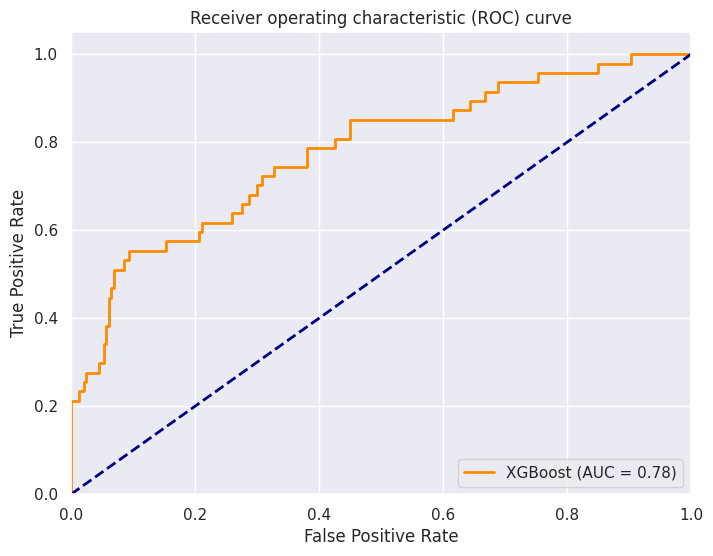

In [ ]:
# get predicted probabilities for positive class
y_prob_xgb_smote = xgb_smote.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_xgb_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


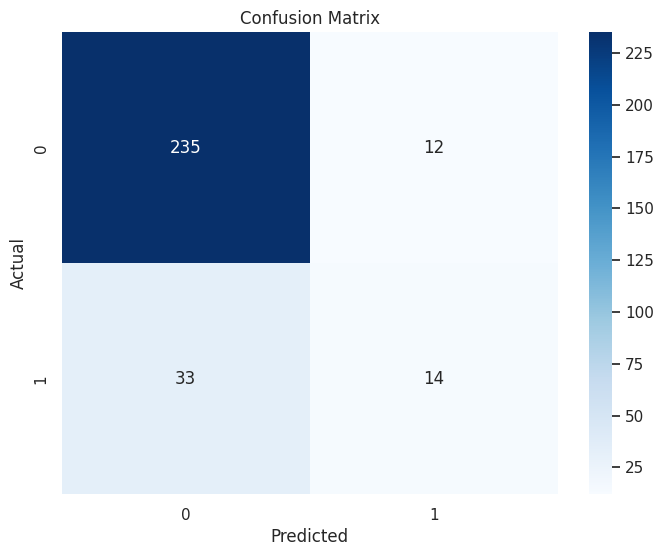

In [ ]:
# get predicted labels
y_pred_xgb_smote = xgb_smote.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Create AdaBoost model
ada_smote = AdaBoostClassifier(random_state=42)

# Train the model on the training data
ada_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_ada_smote = ada_smote.predict(X_test)

# Generate classification report
ada_smote_metrics = classification_report(y_test, y_pred_ada_smote, zero_division=1)
print(ada_smote_metrics)



              precision    recall  f1-score   support

           0       0.90      0.91      0.90       247
           1       0.48      0.45      0.46        47

    accuracy                           0.83       294
   macro avg       0.69      0.68      0.68       294
weighted avg       0.83      0.83      0.83       294



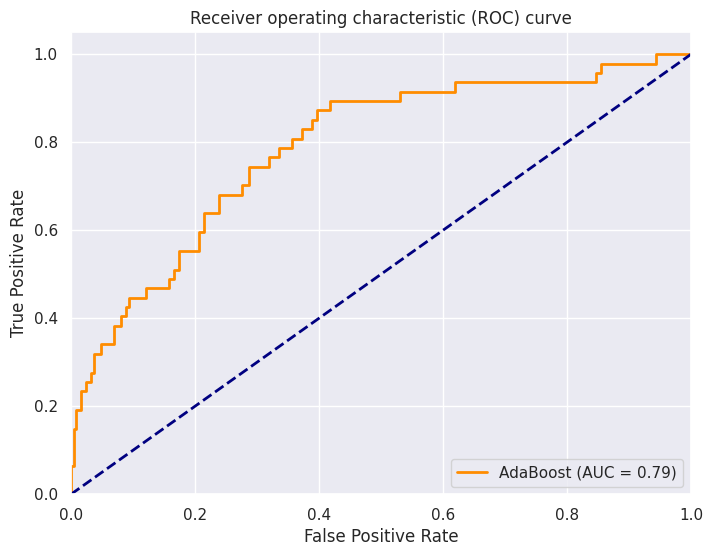

In [ ]:
# get predicted probabilities for positive class
y_prob_ada_smote = ada_smote.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ada_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_ada_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AdaBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

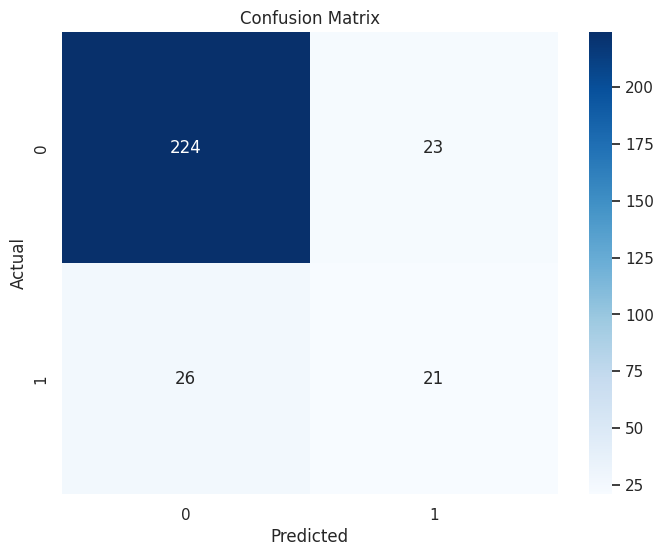

In [ ]:

# get predicted labels
y_pred_ada_smote = ada_smote.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_ada_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Creat new df without the target attribute
df_one_hot1 = df_one_hot.drop('Attrition', axis=1)

In [ ]:
# Check
df_one_hot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 84 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   HourlyRate                         1470 non-null   float64
 4   MonthlyIncome                      1470 non-null   float64
 5   MonthlyRate                        1470 non-null   float64
 6   NumCompaniesWorked                 1470 non-null   float64
 7   PercentSalaryHike                  1470 non-null   float64
 8   TotalWorkingYears                  1470 non-null   float64
 9   YearsAtCompany                     1470 non-null   float64
 10  YearsInCurrentRole                 1470 non-null   float64
 11  YearsSinceLastPromotion            1470 non-null   float

**PERFORMING PCA**

---



---



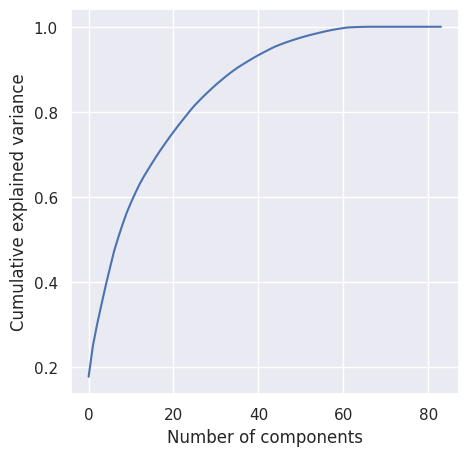

Number of components to keep 80% variance: 25
Number of components to keep 90% variance: 36


In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA().fit(X)  # X data matrix


# Plot the cumulative explained variance ratio for all the principal components
plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Determine the number of components needed to explain 80-90% variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print("Number of components to keep 80% variance:", n_components)

n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print("Number of components to keep 90% variance:", n_components)


In [ ]:
# From the above graph, i cocnclude that the number of principal components to choose is 36

In [ ]:
# Fit PCA to training AUGMENTED data
pca = PCA(n_components=36)
X_train_pca_smote = pca.fit_transform(X_train_smote)

# Transform test data using the same PCA object
X_test_pca = pca.transform(X_test)


1. PCA (SMOTE) - LOGISTIC REGRESSION

---



---



In [ ]:
# create logistic regression model
lr_pca_smote = LogisticRegression(random_state=42, max_iter=1000, class_weight = 'balanced' )

# train model on resampled data
lr_pca_smote.fit(X_train_pca_smote, y_train_smote)

# predict on test data
y_pred_lr_pca_smote = lr_pca_smote.predict(X_test_pca)

lr_pca_smote_metrics = classification_report(y_test, y_pred_lr_pca_smote)
# evaluate model performance on test data
print(lr_pca_smote_metrics)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       247
           1       0.55      0.47      0.51        47

    accuracy                           0.85       294
   macro avg       0.73      0.70      0.71       294
weighted avg       0.85      0.85      0.85       294



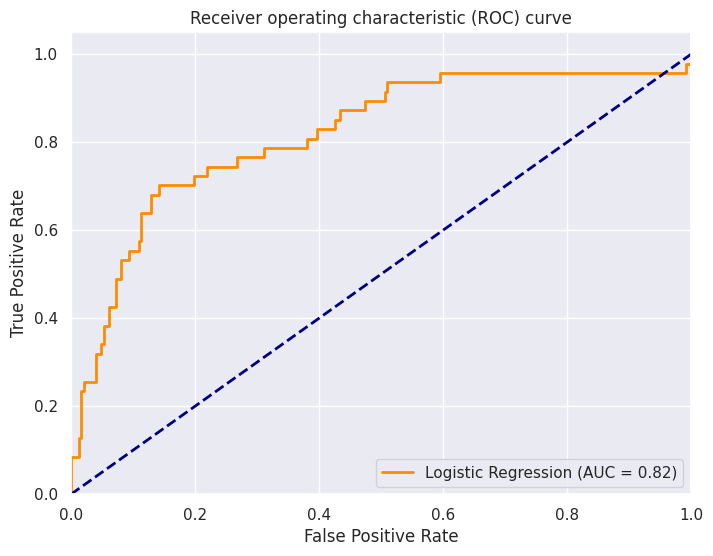

In [ ]:
# get predicted probabilities for positive class
y_prob_lr_pca_smote = lr_pca_smote.predict_proba(X_test_pca)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_pca_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_lr_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

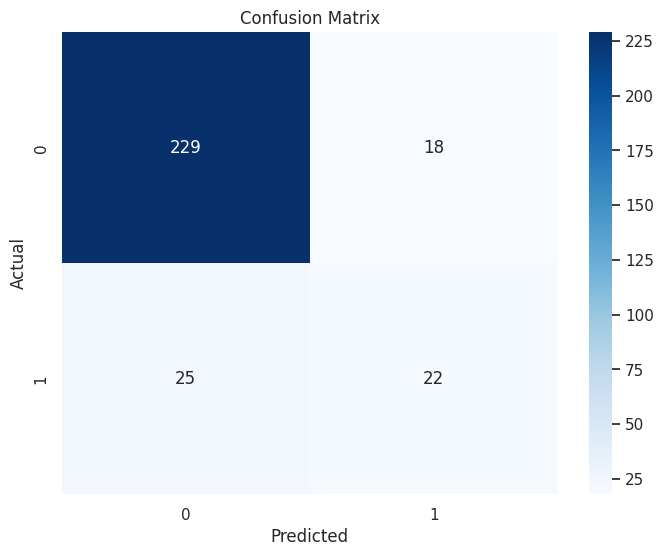

In [ ]:
# get predicted labels
y_pred_lr_pca_smote = lr_pca_smote.predict(X_test_pca)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. PCA (SMOTE) - DECISION TREE

---



---



In [ ]:
# create Decision Tree model
dt_pca_smote = DecisionTreeClassifier(random_state=42,  max_depth = 4,min_samples_leaf = 1, class_weight = 'balanced')

# train model on resampled data
dt_pca_smote.fit(X_train_pca_smote, y_train_smote)

# predict on test data
y_pred_dt_pca_smote = dt_pca_smote.predict(X_test_pca)

# evaluate model performance on test data
dt_pca_smote_metrics = classification_report(y_test, y_pred_dt_pca_smote)
print(dt_pca_smote_metrics)


              precision    recall  f1-score   support

           0       0.93      0.77      0.84       247
           1       0.37      0.70      0.48        47

    accuracy                           0.76       294
   macro avg       0.65      0.74      0.66       294
weighted avg       0.84      0.76      0.78       294



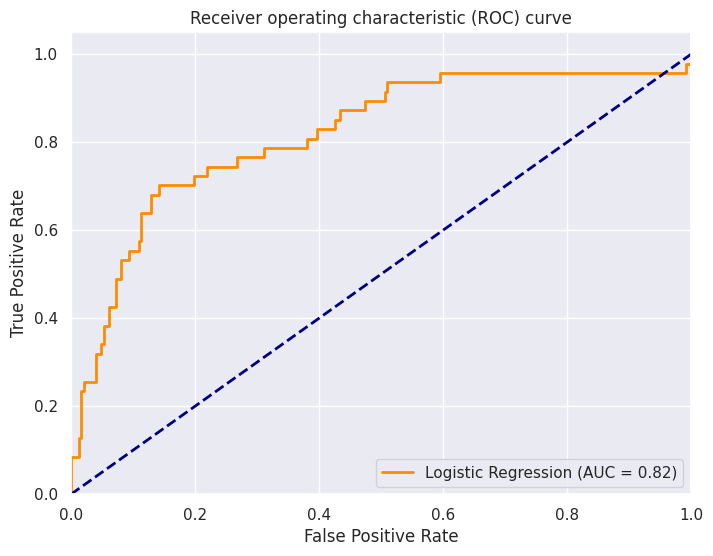

In [ ]:
# get predicted probabilities for positive class
y_prob_lr_pca_smote = lr_pca_smote.predict_proba(X_test_pca)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_pca_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_lr_pca_smote)

# set the figure size
plt.figure(figsize=(8, 6))

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


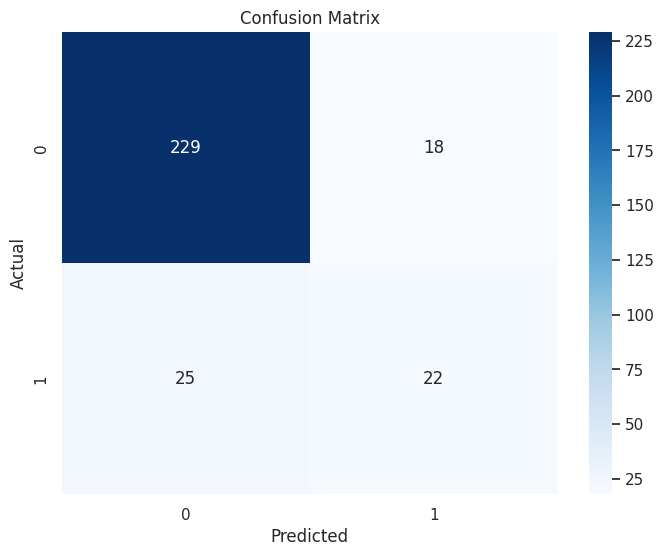

In [ ]:
# get predicted labels
y_pred_lr_pca_smote = lr_pca_smote.predict(X_test_pca)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3. PCA (SMOTE) - RANDOM FOREST

---



---

In [ ]:
# create Random Forest model
rf_pca_smote = RandomForestClassifier(random_state=42, criterion='gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 4, n_estimators = 100)

# train model on train data
rf_pca_smote.fit(X_train_pca_smote, y_train_smote)

# predict on test data
y_pred_rf_pca_smote = rf_pca_smote.predict(X_test_pca)

rf_pca_smote_metrics = classification_report(y_test, y_pred_rf_pca_smote)
# evaluate model performance on test data
print(rf_pca_smote_metrics)


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294



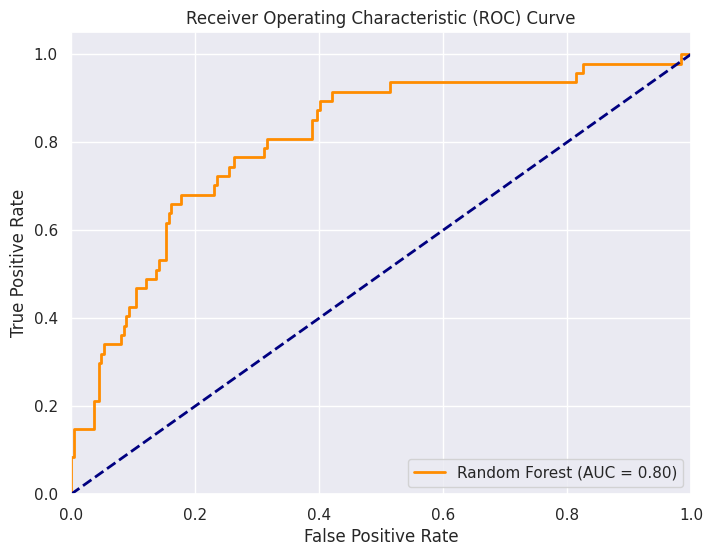

In [ ]:
# create Random Forest model
rf_pca_smote = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100)

# train model on train data
rf_pca_smote.fit(X_train_pca_smote, y_train_smote)

# get predicted probabilities for positive class
y_prob_rf_pca_smote = rf_pca_smote.predict_proba(X_test_pca)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_pca_smote)

# calculate AUC score
auc = roc_auc_score(y_test, y_prob_rf_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


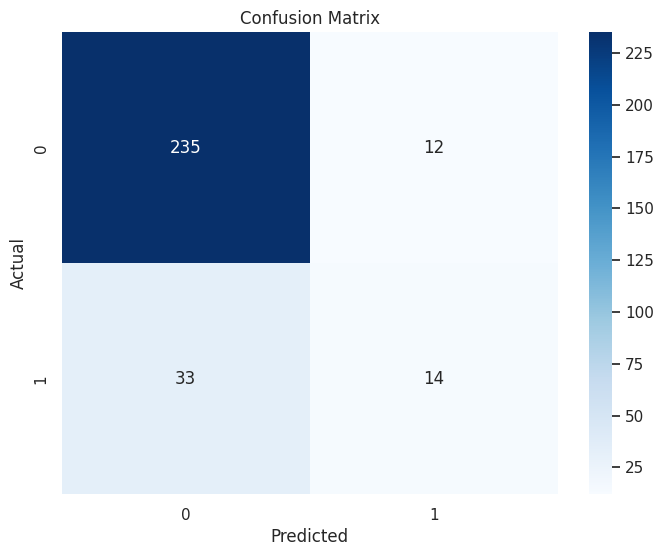

In [ ]:
# create Random Forest model
rf_pca_smote = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100)

# train model on train data
rf_pca_smote.fit(X_train_pca_smote, y_train_smote)

# predict on test data
y_pred_rf_pca_smote = rf_pca_smote.predict(X_test_pca)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


4. PCA (SMOTE) - GRADIENT BOOSTING

---



---


In [ ]:
# Create Gradient Boosting Classifier
gb_pca_smote = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_pca_smote.fit(X_train_pca_smote, y_train_smote)

# Predict the target variable for test data
y_pred_gb_pca_smote = gb_pca_smote.predict(X_test_pca)

gb_pca_smote_metrics = classification_report(y_test, y_pred_gb_pca_smote)
# evaluate model performance on test data
print(gb_pca_smote_metrics)


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       247
           1       0.43      0.40      0.42        47

    accuracy                           0.82       294
   macro avg       0.66      0.65      0.66       294
weighted avg       0.82      0.82      0.82       294



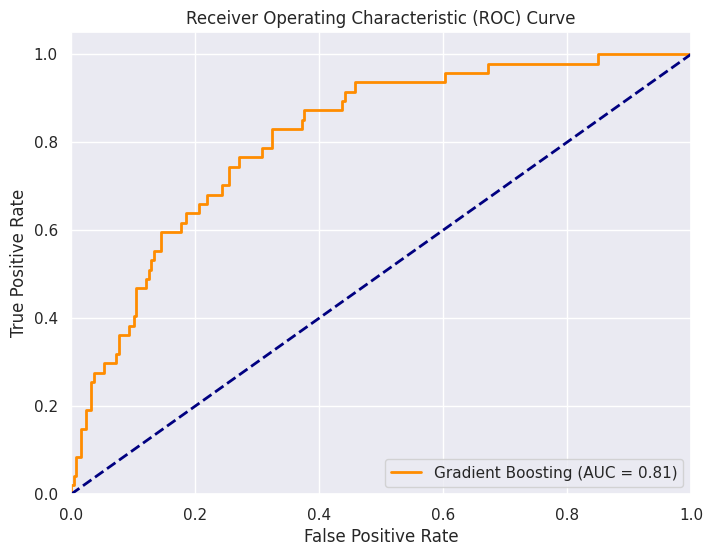

In [ ]:
# Create Gradient Boosting Classifier
gb_pca_smote = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_pca_smote.fit(X_train_pca_smote, y_train_smote)

# Predict the target variable probabilities for test data
y_prob_gb_pca_smote = gb_pca_smote.predict_proba(X_test_pca)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb_pca_smote)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_gb_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


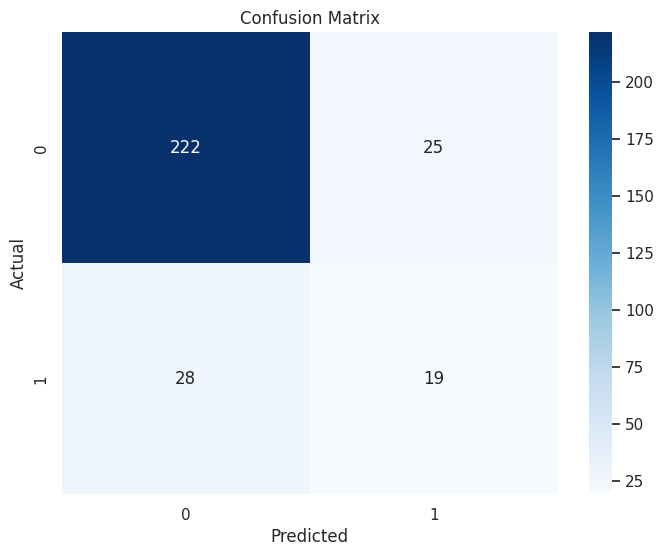

In [ ]:
# Create Gradient Boosting Classifier
gb_pca_smote = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_pca_smote.fit(X_train_pca_smote, y_train_smote)

# Predict the target variable for test data
y_pred_gb_pca_smote = gb_pca_smote.predict(X_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gb_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


5. PCA (SMOTE) - XGBoost CLASSIFIER

---



---



In [ ]:
# Create XGBoost Classifier
xgb_pca_smote = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_pca_smote.fit(X_train_pca_smote, y_train_smote)

# Predict the target variable for test data
y_pred_xgb_pca_smote = xgb_pca_smote.predict(X_test_pca)

xgb_pca_smote_metrics = classification_report(y_test, y_pred_xgb_pca_smote)
# evaluate model performance on test data
print(xgb_pca_smote_metrics)


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.49      0.38      0.43        47

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.82      0.84      0.83       294



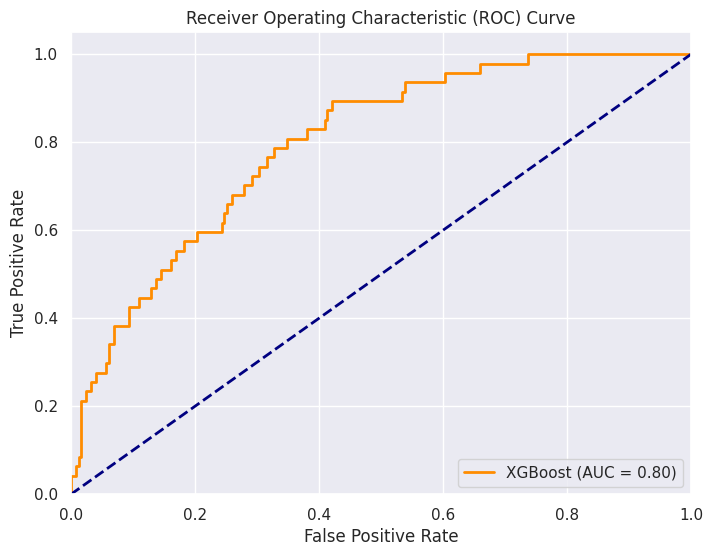

In [ ]:
# Create XGBoost Classifier
xgb_pca_smote = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_pca_smote.fit(X_train_pca_smote, y_train_smote)

# Predict the target variable probabilities for test data
y_prob_xgb_pca_smote = xgb_pca_smote.predict_proba(X_test_pca)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb_pca_smote)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_xgb_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


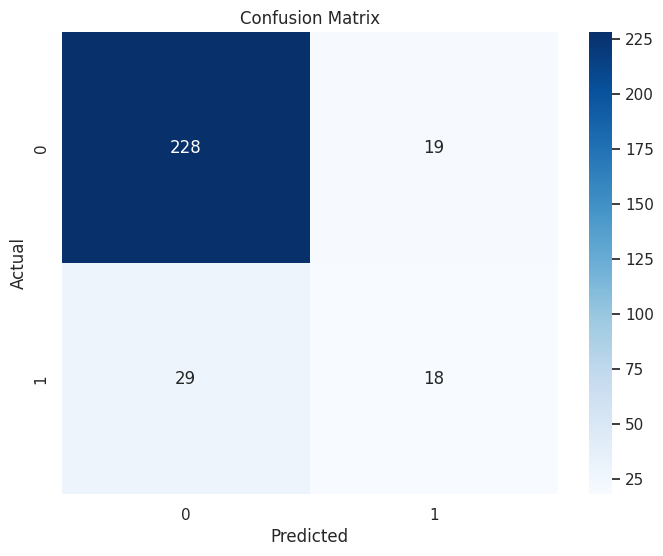

In [ ]:
# Create XGBoost Classifier
xgb_pca_smote = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_pca_smote.fit(X_train_pca_smote, y_train_smote)

# Predict the target variable for test data
y_pred_xgb_pca_smote = xgb_pca_smote.predict(X_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_pca_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


RECURSIVE FEATURE ELIMINATION

---



---



In [ ]:
# define the model to use for feature selection
model = RandomForestClassifier(n_estimators=100, random_state=42)

# define the RFE method and specify the number of features to select
rfe = RFE(model, n_features_to_select=20)

# fit the RFE model to the training data
rfe.fit(X_train_smote, y_train_smote)

# extract the selected feature indices
selected_features = rfe.get_support(indices=True)

# convert selected_features to a comma-separated string
selected_features_str = ','.join(map(str, selected_features))

# subset the training and testing data to include only the selected features
X_train_rfe = X_train_smote.iloc[:, selected_features]
X_test_rfe = X_test.iloc[:, selected_features]

# Print the selected_features as a comma-separated list
print(selected_features_str)


0,1,2,3,4,5,6,7,8,9,10,11,12,36,37,39,49,62,70,82


In [ ]:
# Create a new Random Forest Classifier using only the selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_selected = X_train_smote.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Train the model on the selected features
model.fit(X_train_selected, y_train_smote)

# Make predictions on the test data using the trained model
y_pred = model.predict(X_test_selected)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.41      0.23      0.30        47

    accuracy                           0.82       294
   macro avg       0.64      0.58      0.60       294
weighted avg       0.79      0.82      0.80       294



In [ ]:
from sklearn.linear_model import LinearRegression

# Define the model to use for feature selection
model = LinearRegression()

# Define the RFE method and specify the number of features to select
rfe = RFE(model, n_features_to_select=20)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Extract the selected feature indices
selected_features = rfe.get_support(indices=True)

# Convert selected_features to a comma-separated string
selected_features_str = ','.join(map(str, selected_features))

# Subset the training and testing data to include only the selected features
X_train_rfe = X_train.iloc[:, selected_features]
X_test_rfe = X_test.iloc[:, selected_features]

# Print the selected_features as a comma-separated list
print(selected_features_str)


19,20,21,22,23,24,54,55,56,57,58,65,67,73,74,75,76,77,78,79


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a new Linear Regression model using only the selected features
model = LinearRegression()
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test data using the trained model
y_pred = model.predict(X_test_selected)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.12468495336519618


**WITHOUT DATA AUGMENTATION / SMOTE**

---



---



1. LOGISTIC REGRESSION

---



---



In [ ]:
# create logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight = None )

# train model on resampled data
lr.fit(X_train, y_train)

# predict on test data
y_pred_lr = lr.predict(X_test)

lr_metrics = classification_report(y_test, y_pred_lr)
# evaluate model performance on test data
print(lr_metrics)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.71      0.47      0.56        47

    accuracy                           0.88       294
   macro avg       0.81      0.72      0.75       294
weighted avg       0.87      0.88      0.87       294



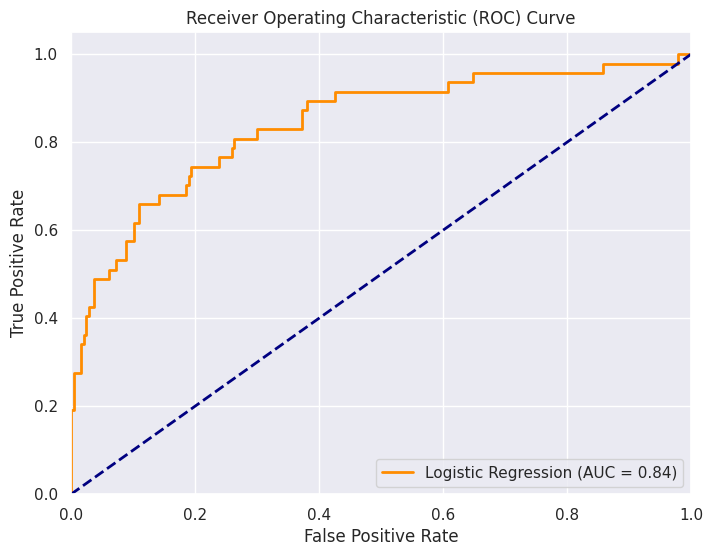

In [ ]:
# Create logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight=None)

# Train model on resampled data
lr.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_lr)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


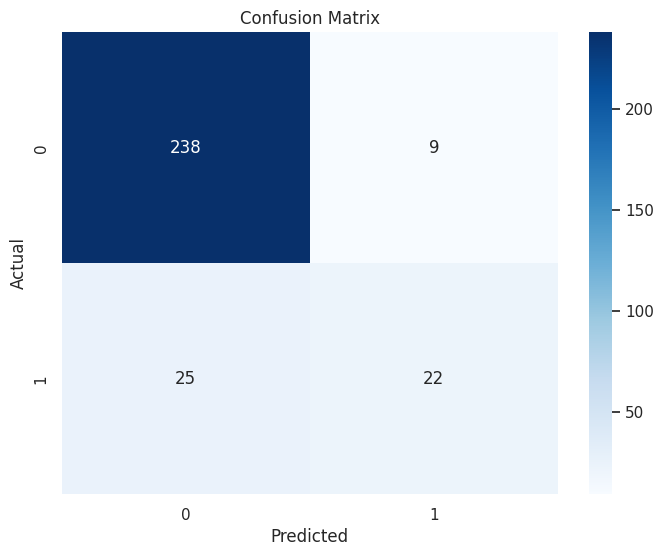

In [ ]:
# Create logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight=None)

# Train model on resampled data
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


2. DECISION TREE

---



---



In [ ]:
# from sklearn.model_selection import GridSearchCV

# # create Decision Tree model
# dt = DecisionTreeClassifier(random_state=42)

# # define hyperparameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 25],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'class_weight': [None, 'balanced'],
#     'ccp_alpha': [0.0, 0.1, 0.01]
# }

# # perform grid search with 5-fold cross validation
# dt_grid = GridSearchCV(dt, param_grid, cv=5)

# # fit grid search on training data
# dt_grid.fit(X_train, y_train)

# # predict on test data using best model
# y_pred = dt_grid.predict(X_test)

# # evaluate model performance on test data
# dt_metrics = classification_report(y_test, y_pred)
# print(dt_metrics)

# # print best hyperparameters
# print("Best hyperparameters:", dt_grid.best_params_)


In [ ]:
# create Decision Tree model
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='random', max_depth=100, min_samples_split=10, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, class_weight=None, ccp_alpha=0.0)

# train model on resampled data
dt.fit(X_train, y_train)

# predict on test data
y_pred_dt = dt.predict(X_test)

# evaluate model performance on test data
dt_metrics = classification_report(y_test, y_pred_dt)
print(dt_metrics)


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       247
           1       0.40      0.36      0.38        47

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.80      0.81      0.81       294



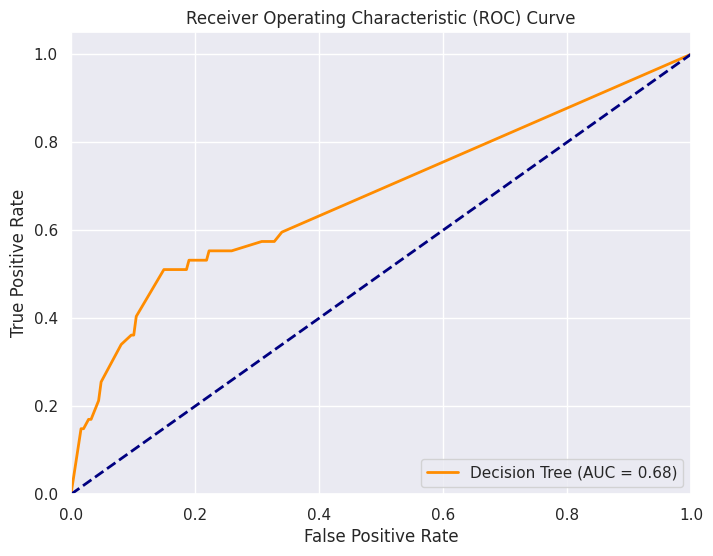

In [ ]:
# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='random', max_depth=100, min_samples_split=10, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, class_weight=None, ccp_alpha=0.0)

# Train model on resampled data
dt.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_dt)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


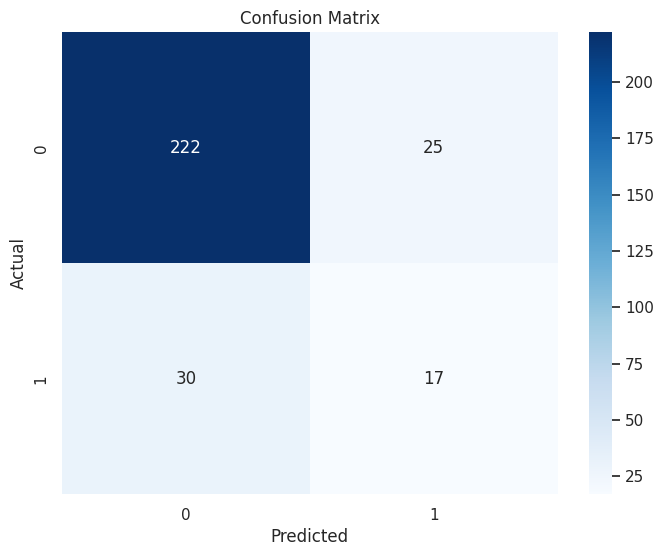

In [ ]:
# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='random', max_depth=100, min_samples_split=10, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, class_weight=None, ccp_alpha=0.0)

# Train model on resampled data
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# # create a random forest classifier
# rf = RandomForestClassifier(random_state=42)

# # define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [5, 10, 15, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # create the grid search object
# grid_rf = GridSearchCV(rf, param_grid, cv=5)


# # fit the grid search object to the data
# grid_rf.fit(X_train, y_train)

# # print the best parameters and the corresponding score
# print("Best parameters: ", grid_rf.best_params_)
# print("Best score: ", grid_rf.best_score_)


3. RANDOM FOREST CLASSIFIER

---



---



In [ ]:
# create Random Forest model
rf = RandomForestClassifier(random_state=42, criterion='gini', max_depth = 10, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50)

# train model on train data
rf.fit(X_train, y_train)

# predict on test data
y_pred_rf = rf.predict(X_test)

rf_metrics = classification_report(y_test, y_pred_rf)
# evaluate model performance on test data
print(rf_metrics)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294



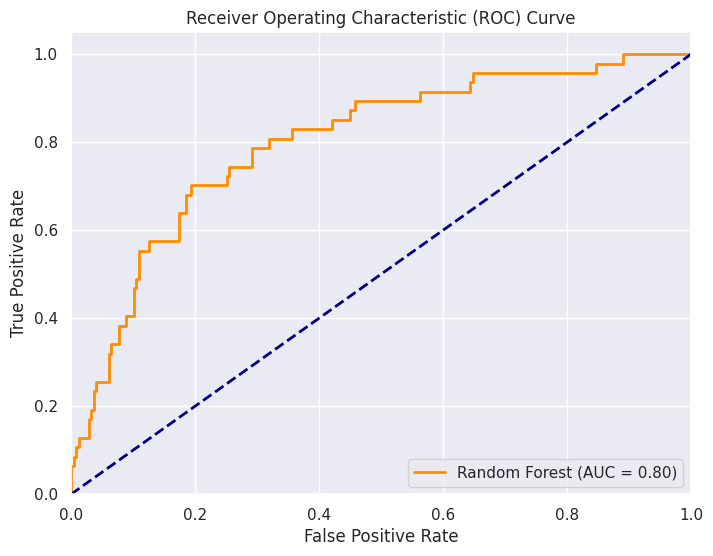

In [ ]:
# Create Random Forest model
rf = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)

# Train model on train data
rf.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_rf)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


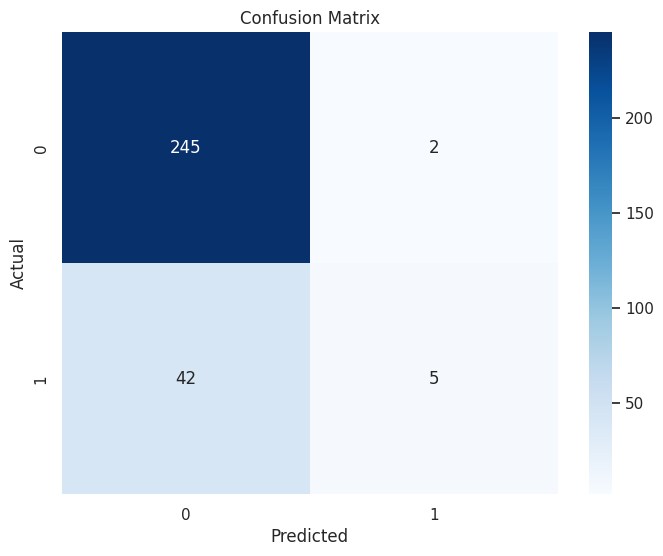

In [ ]:
# Create Random Forest model
rf = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)

# Train model on train data
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


4. GRADIENT BOOSTING

---



---



In [ ]:
# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

# Predict the target variable for test data
y_pred_gb = gb.predict(X_test)

gb_metrics = classification_report(y_test, y_pred_gb)
# evaluate model performance on test data
print(gb_metrics)


              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.57      0.17      0.26        47

    accuracy                           0.85       294
   macro avg       0.72      0.57      0.59       294
weighted avg       0.81      0.85      0.81       294



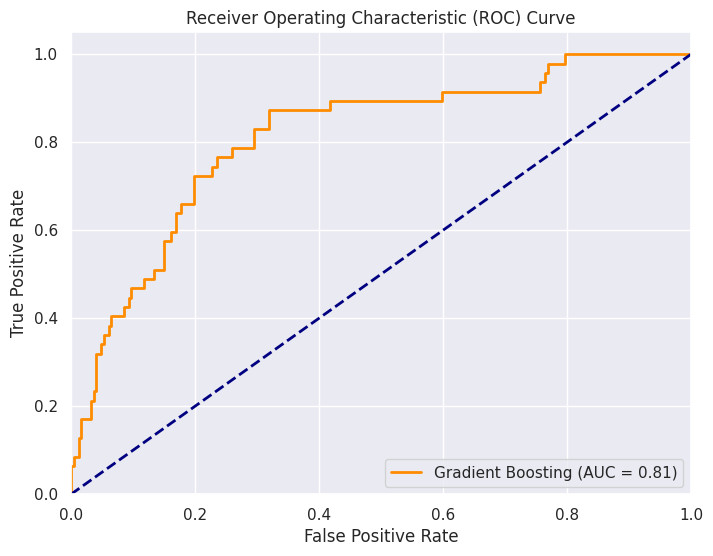

In [ ]:
# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_prob_gb = gb.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_gb)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


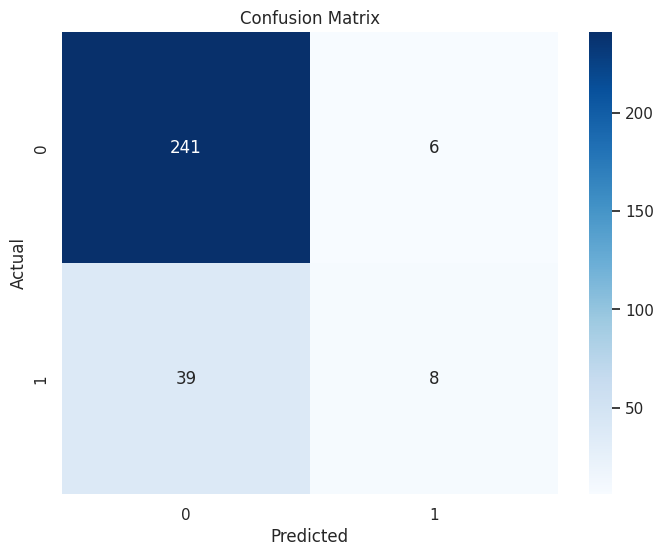

In [ ]:
# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

# Predict the target variable for test data
y_pred_gb = gb.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


5. XGBoost CLASSIFIER

---



---



In [ ]:
# Create XGBoost Classifier
xgb = xgb.XGBClassifier(random_state=42)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict the target variable for test data
y_pred_xgb = xgb.predict(X_test)

xgb_metrics = classification_report(y_test, y_pred_xgb)
# evaluate model performance on test data
print(xgb_metrics)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.61      0.23      0.34        47

    accuracy                           0.85       294
   macro avg       0.74      0.60      0.63       294
weighted avg       0.83      0.85      0.83       294



**PERFORMING PCA TO NON-AUGMENTED DATA**

---



---






In [ ]:
# Fit PCA to training NON-AUGMENTED data
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train)

# Transform test data using the same PCA object
X_test_pca = pca.transform(X_test)

1. LOGISTIC REGRESSION PCA

---



---



In [ ]:
# create logistic regression model
lr_pca = LogisticRegression(random_state=42, max_iter=1000, class_weight = None )

# train model on resampled data
lr_pca.fit(X_train_pca, y_train)

# predict on test data
y_pred_lr_pca = lr.predict(X_test)

lr_pca_metrics = classification_report(y_test, y_pred_lr_pca)
# evaluate model performance on test data
print(lr_pca_metrics)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.71      0.47      0.56        47

    accuracy                           0.88       294
   macro avg       0.81      0.72      0.75       294
weighted avg       0.87      0.88      0.87       294



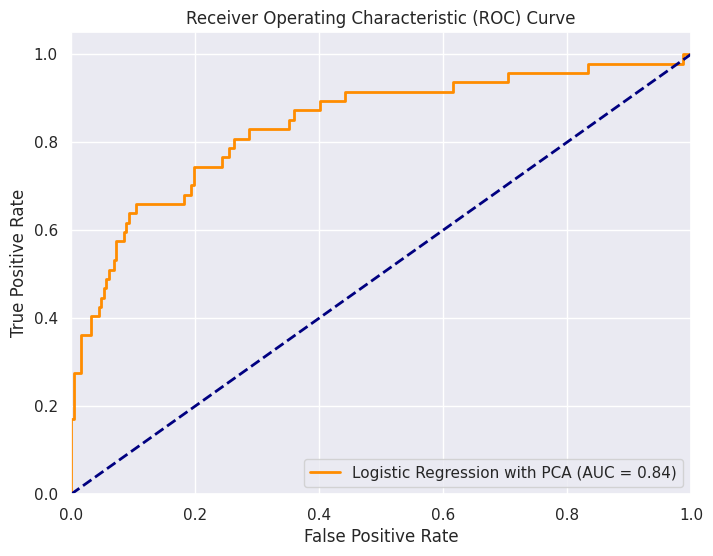

In [ ]:
# Create logistic regression model with PCA
lr_pca = LogisticRegression(random_state=42, max_iter=1000, class_weight=None)

# Train model on resampled data
lr_pca.fit(X_train_pca, y_train)

# Get predicted probabilities for positive class
y_prob_lr_pca = lr_pca.predict_proba(X_test_pca)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_pca)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_lr_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression with PCA (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


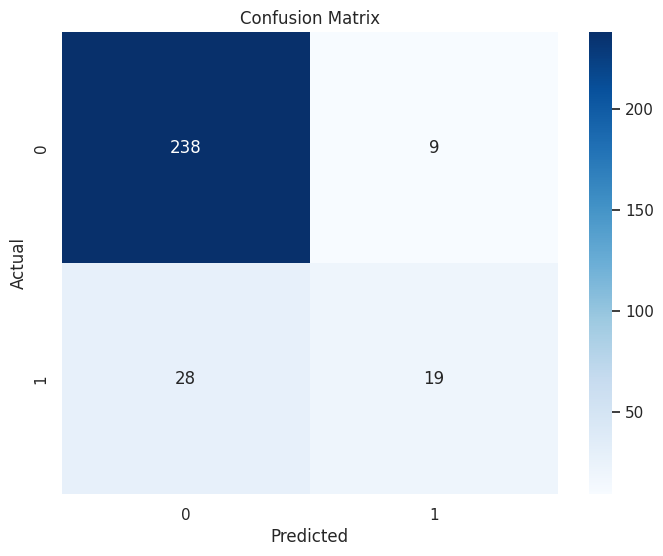

In [ ]:
# Create logistic regression model with PCA
lr_pca = LogisticRegression(random_state=42, max_iter=1000, class_weight=None)

# Train model on resampled data
lr_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_lr_pca = lr_pca.predict(X_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


2. DECISION TREE PCA

---



---



In [ ]:
# create Decision Tree model
dt_pca = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='random', max_depth=10, min_samples_split=10, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, class_weight=None, ccp_alpha=0.0)

# train model on resampled data
dt_pca.fit(X_train_pca, y_train)

# predict on test data
y_pred_dt_pca = dt_pca.predict(X_test_pca)

# evaluate model performance on test data
dt_pca_metrics = classification_report(y_test, y_pred_dt_pca)
print(dt_pca_metrics)


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       247
           1       0.43      0.32      0.37        47

    accuracy                           0.82       294
   macro avg       0.65      0.62      0.63       294
weighted avg       0.80      0.82      0.81       294



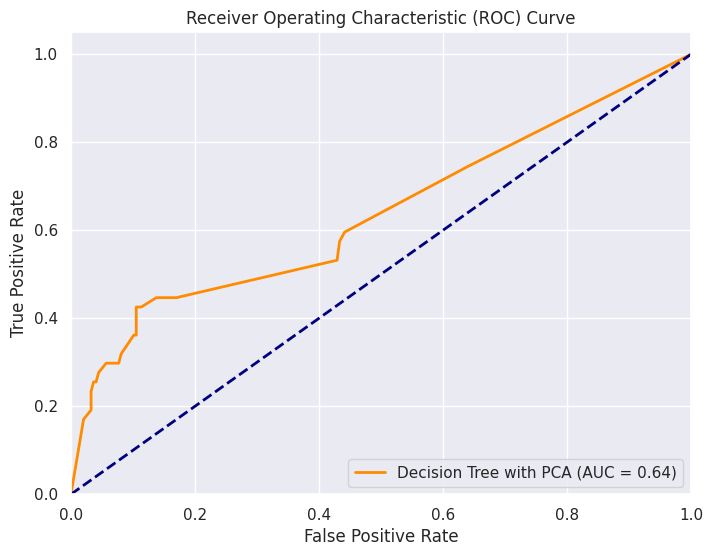

In [ ]:
# Create Decision Tree model with PCA
dt_pca = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='random', max_depth=10, min_samples_split=10, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, class_weight=None, ccp_alpha=0.0)

# Train model on resampled data
dt_pca.fit(X_train_pca, y_train)

# Get predicted probabilities for positive class
y_prob_dt_pca = dt_pca.predict_proba(X_test_pca)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt_pca)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_dt_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree with PCA (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


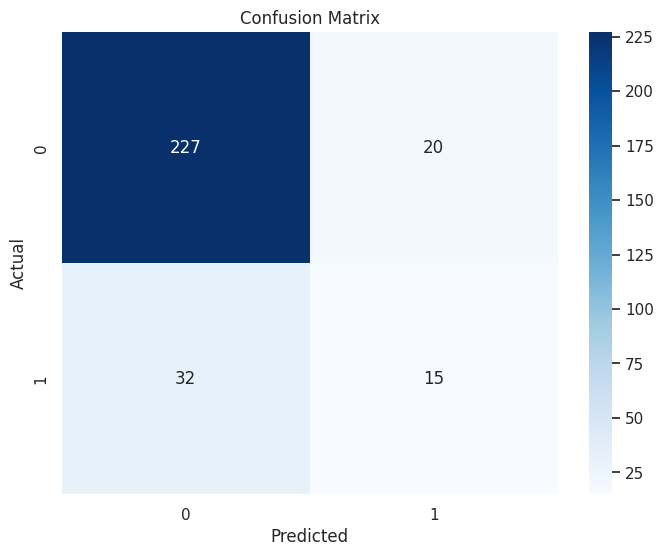

In [ ]:
# Create Decision Tree model with PCA
dt_pca = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='random', max_depth=10, min_samples_split=10, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, class_weight=None, ccp_alpha=0.0)

# Train model on resampled data
dt_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_dt_pca = dt_pca.predict(X_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # create Decision Tree model
# dt_pca = DecisionTreeClassifier(random_state=42)

# # define range of alpha values to test
# params = {'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

# # perform grid search to find optimal value of alpha
# grid_search = GridSearchCV(dt_pca, params, cv=5)
# grid_search.fit(X_train_pca, y_train)

# # create pruned decision tree model with optimal alpha value
# dt_pca_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=grid_search.best_params_['ccp_alpha'])
# dt_pca_pruned.fit(X_train_pca, y_train)

# # predict on test data
# y_pred_dt_pca_pruned = dt_pca_pruned.predict(X_test_pca)

# # evaluate model performance on test data
# dt_pca_pruned_metrics = classification_report(y_test, y_pred_dt_pca_pruned)
# print(dt_pca_pruned_metrics)


3. RANDOM FOREST CLASSIFIER PCA

---



---



In [ ]:
# create Random Forest model
rf_pca = RandomForestClassifier(random_state=42, criterion='gini', max_depth = 10, min_samples_leaf = 5, min_samples_split = 4, n_estimators = 50)

# train model on train data
rf_pca.fit(X_train_pca, y_train)

# predict on test data
y_pred_rf_pca = rf_pca.predict(X_test_pca)

rf_pca_metrics = classification_report(y_test, y_pred_rf_pca)
# evaluate model performance on test data
print(rf_pca_metrics)

              precision    recall  f1-score   support

           0       0.85      1.00      0.91       247
           1       0.67      0.04      0.08        47

    accuracy                           0.84       294
   macro avg       0.76      0.52      0.50       294
weighted avg       0.82      0.84      0.78       294



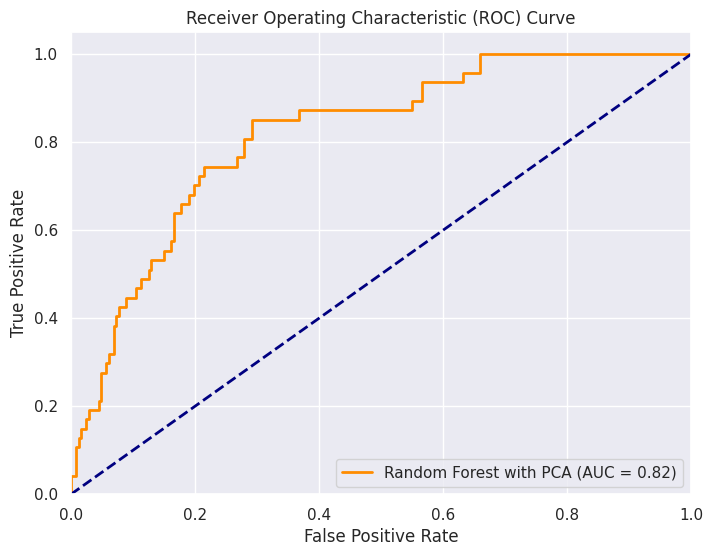

In [ ]:
# Create Random Forest model with PCA
rf_pca = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=50)

# Train model on train data
rf_pca.fit(X_train_pca, y_train)

# Get predicted probabilities for positive class
y_prob_rf_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_pca)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_rf_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest with PCA (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


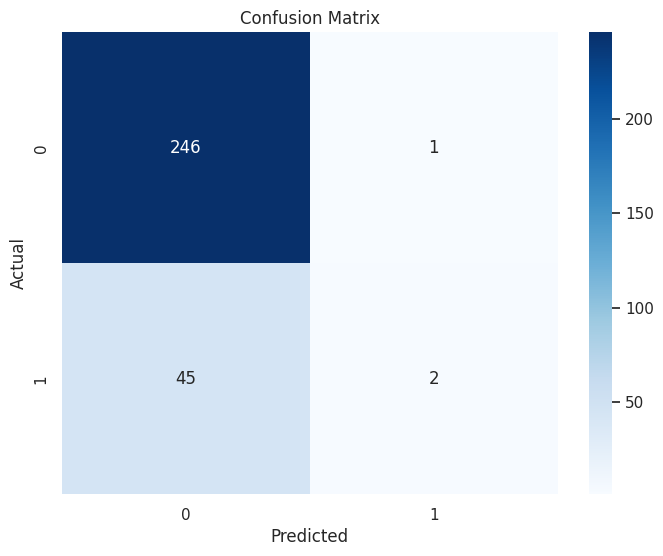

In [ ]:
# Create Random Forest model with PCA
rf_pca = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=50)

# Train model on train data
rf_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_rf_pca = rf_pca.predict(X_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


4. GRADIENT BOOSTING PCA

---



---



In [ ]:
# Create Gradient Boosting Classifier
gb_pca = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_gb_pca = gb_pca.predict(X_test_pca)

gb_pca_metrics = classification_report(y_test, y_pred_gb_pca)
# evaluate model performance on test data
print(gb_pca_metrics)


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.50      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.68      0.58      0.59       294
weighted avg       0.80      0.84      0.81       294



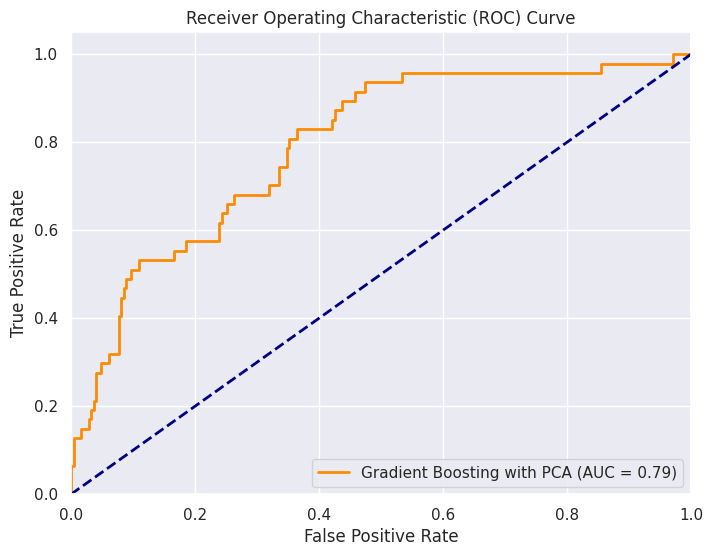

In [ ]:
# Create Gradient Boosting Classifier with PCA
gb_pca = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_pca.fit(X_train_pca, y_train)

# Get predicted probabilities for positive class
y_prob_gb_pca = gb_pca.predict_proba(X_test_pca)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb_pca)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob_gb_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gradient Boosting with PCA (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


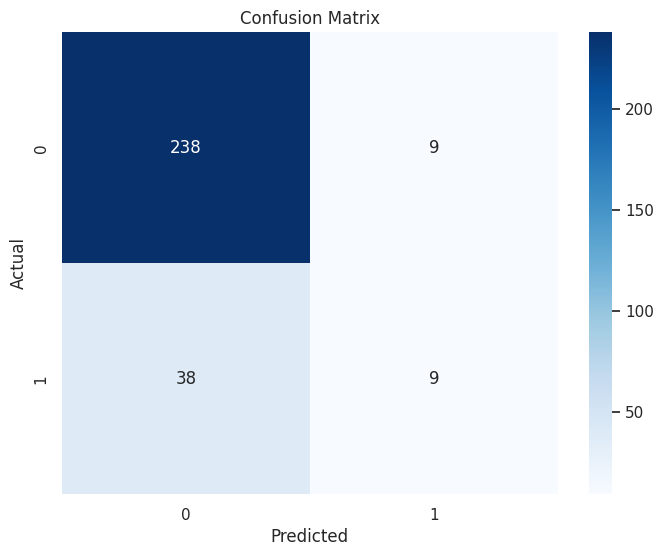

In [ ]:
# Create Gradient Boosting Classifier with PCA
gb_pca = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_gb_pca = gb_pca.predict(X_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_gb_pca)
# set the figure size
plt.figure(figsize=(8, 6))
# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


5. XGBoost CLASSIFIER PCA

---



---



In [ ]:
# Create XGBoost Classifier
xgb_pca = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)

xgb_pca_metrics = classification_report(y_test, y_pred_xgb_pca)
# evaluate model performance on test data
print(xgb_pca_metrics)


              precision    recall  f1-score   support

           0       0.87      0.98      0.93       247
           1       0.75      0.26      0.38        47

    accuracy                           0.87       294
   macro avg       0.81      0.62      0.65       294
weighted avg       0.85      0.87      0.84       294



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Create AdaBoost Classifier
ada_pca = AdaBoostClassifier(random_state=42, n_estimators = 300)

# Fit the model to the training data
ada_pca.fit(X_train_pca, y_train)

# Predict the target variable for test data
y_pred_ada_pca = ada_pca.predict(X_test_pca)

ada_pca_metrics = classification_report(y_test, y_pred_ada_pca)
# Evaluate model performance on test data
print(ada_pca_metrics)


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.47      0.38      0.42        47

    accuracy                           0.83       294
   macro avg       0.68      0.65      0.66       294
weighted avg       0.82      0.83      0.83       294



CLUSTERING

---



---



1.K-MEANS





In [ ]:
# Separating independent and dependent attributes
X1 = new_df.drop(['Attrition'], axis = 1)

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the numerical attributes
X1[num_at_scale] = scaler.fit_transform(X1[num_at_scale])

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   float64
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   float64
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [ ]:
# Label encoding the categorical attributes
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    X1[col] = le.fit_transform(X1[col])
    le_dict[col] = le


In [ ]:
X1 = X1.drop('Over18', axis =1)

In [ ]:
X1.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.446350               2   0.742527           2         -1.010909   
1  1.322365               1  -1.297775           1         -0.147150   
2  0.008343               2   1.414363           1         -0.887515   
3 -0.429664               1   1.461466           1         -0.764121   
4 -1.086676               2  -0.524295           1         -0.887515   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0          1               1              1               1   
1          0               1              1               2   
2          1               4              1               4   
3          3               1              1               5   
4          0               3              1               7   

   EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
0                        1  ...                         0             80   
1                        2  ...                         3             80   
2                        3  ...                         1             80   
3                        3  ...                         2             80   
4                        0  ...                         3             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0          -0.421642                      0   
1                 1          -0.164511                      3   
2                 0          -0.550208                      3   
3                 0          -0.421642                      3   
4                 1          -0.678774                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                0       -0.164613           -0.063296   
1                2        0.488508            0.764998   
2                2       -1.144294           -1.167687   
3                2        0.161947            0.764998   
4                2       -0.817734           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -0.679146              0.245834  
1                -0.368715              0.806541  
2                -0.679146             -1.155935  
3                 0.252146             -1.155935  
4                -0.058285             -0.595227  

[5 rows x 33 columns]

In [ ]:
new_df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [ ]:
# Calculate correlations with the target variable
correlations = df_one_hot.corr()['Attrition'].sort_values(ascending=False)
# Set max_rows to None to display the entire list
pd.set_option('display.max_rows', None)
# Print correlations
print(correlations)

Attrition                            1.000000
OverTime_Yes                         0.246118
JobLevel_1                           0.212551
StockOptionLevel_0                   0.195342
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
EnvironmentSatisfaction_1            0.122819
JobInvolvement_1                     0.117161
BusinessTravel_Travel_Frequently     0.115143
WorkLifeBalance_1                    0.098689
JobRole_Laboratory Technician        0.098290
JobSatisfaction_1                    0.090329
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
TrainingTimesLastYear_0              0.061894
RelationshipSatisfaction_1           0.059222
EducationField_Marketing             0.055781
JobInvolvement_2                     0.044731
NumCompaniesWorked                   0.043494
TrainingTimesLastYear_4              0.041216
TrainingTimesLastYear_2           

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering


# Select the top correlated features (e.g., top 10)
top_features = correlations[1:].index.tolist()#correlations[1:11]


# Subset the data using the top correlated features
X = df_one_hot[top_features].values

# Perform hierarchical clustering with the correlation matrix as the distance metric
corr_matrix = np.corrcoef(X, rowvar=False)
clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete').fit(corr_matrix)

# Print the cluster labels for the features
print(clustering.labels_)


[0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 1 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering


# Select the top and bottom correlated features (e.g., top 10 and bottom 10)
top_features = correlations[1:11].index.tolist()
# bottom_features = correlations[-10:].index.tolist()
# selected_features = top_features + bottom_features

# Subset the data using the selected features
X = df_one_hot[top_features].values

# Perform hierarchical clustering with the correlation matrix as the distance metric
corr_matrix = np.corrcoef(X, rowvar=False)
clustering = AgglomerativeClustering(n_clusters=2).fit(corr_matrix)

# Print the cluster labels for the features
print(clustering.labels_)


[0 0 1 1 0 0 0 0 0 0]


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = sch.linkage(corr_matrix, method='complete')

print(Z)

print(top_features)

[[ 2.          3.          0.30200354  2.        ]
 [ 1.          9.          0.95978862  2.        ]
 [ 5.          8.          1.36870849  2.        ]
 [ 4.          7.          1.3721126   2.        ]
 [ 0.          6.          1.40527624  2.        ]
 [13.         14.          1.4406976   4.        ]
 [11.         12.          1.48986331  4.        ]
 [15.         16.          1.58494054  8.        ]
 [10.         17.          1.66542273 10.        ]]
['OverTime_Yes', 'JobLevel_1', 'StockOptionLevel_0', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'EnvironmentSatisfaction_1', 'JobInvolvement_1', 'BusinessTravel_Travel_Frequently', 'WorkLifeBalance_1', 'JobRole_Laboratory Technician']


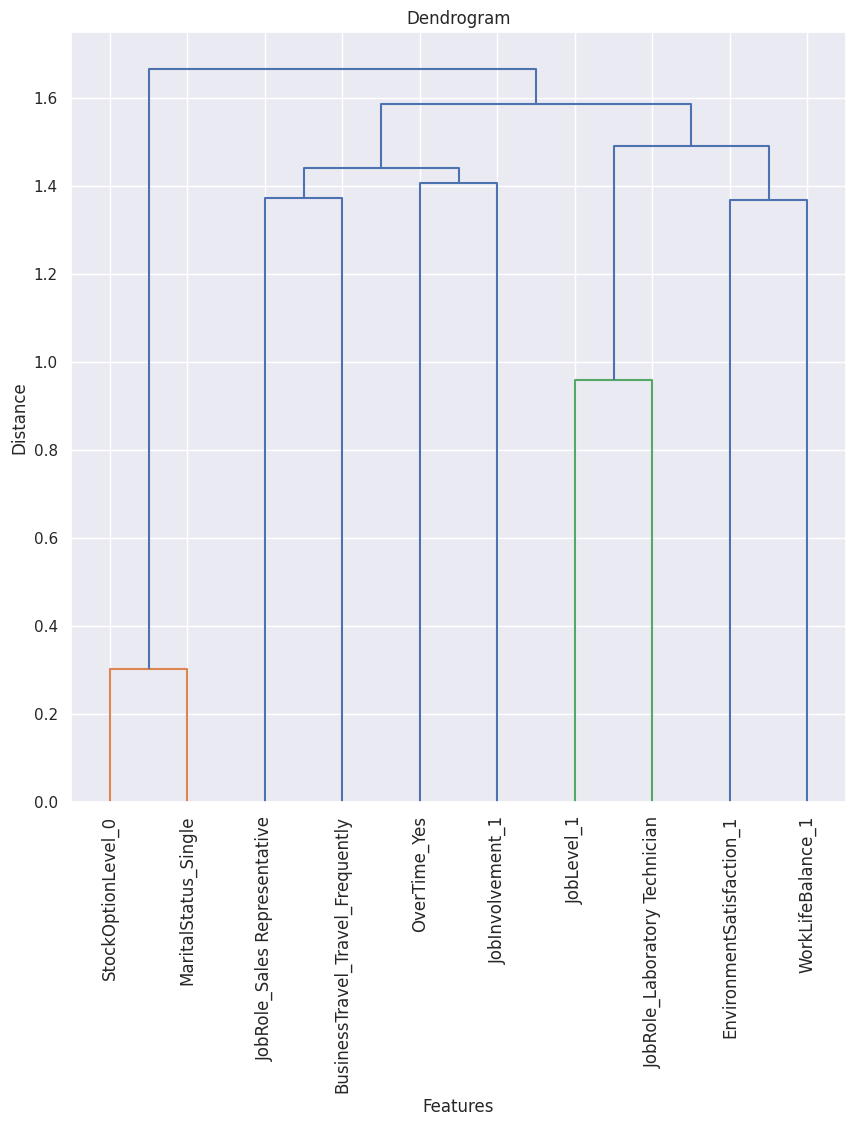

In [ ]:


# Create a dendrogram
plt.figure(figsize=(10, 10))
sch.dendrogram(Z, labels=top_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


<Axes: >

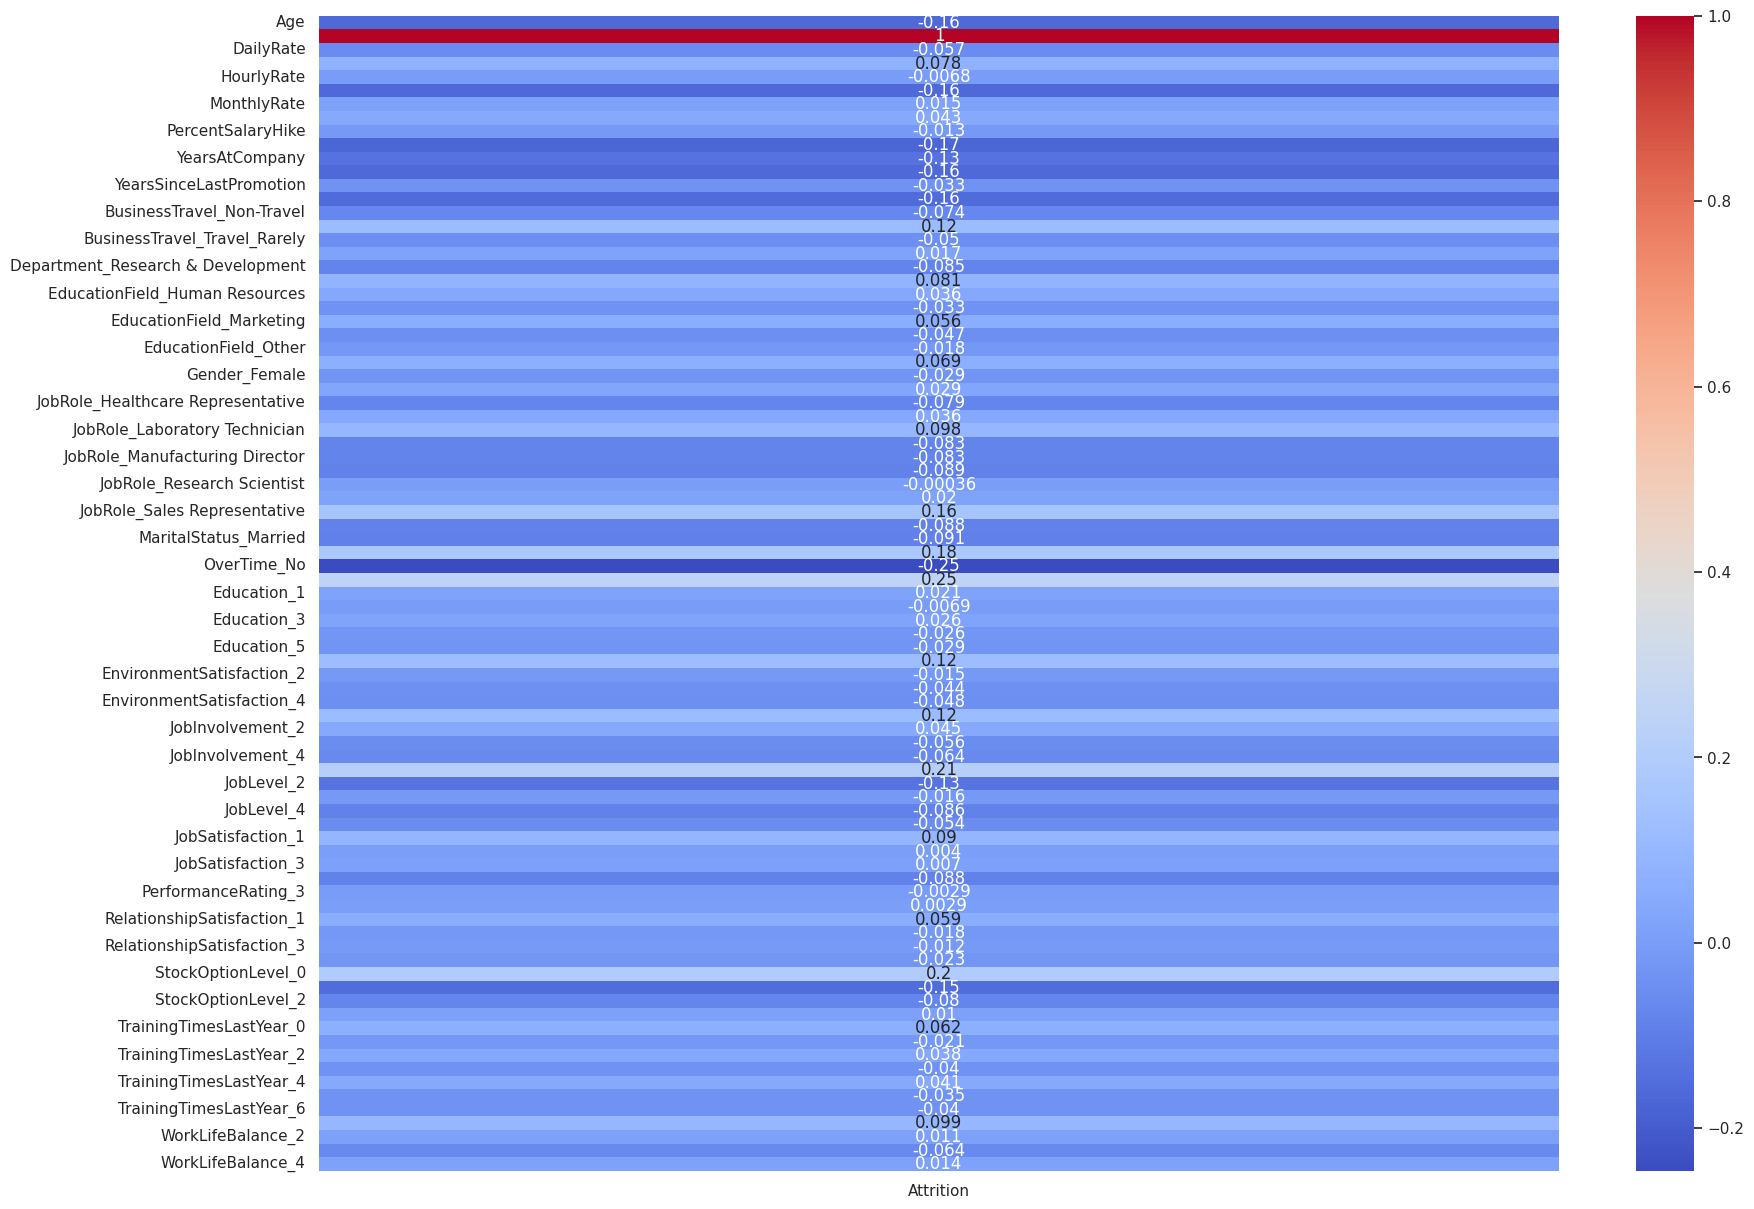

In [ ]:
import seaborn as sns

# Calculate correlations with the target variable
correlations = df_one_hot.corr()['Attrition'].sort_values(ascending=False)

# Create a correlation matrix of all features
corr_matrix = df_one_hot.corr()

# Plot a heatmap of the correlations with the target variable
sns.set(rc={"figure.figsize":(20, 15)})
sns.heatmap(corr_matrix.loc[:, ['Attrition']], annot=True, cmap='coolwarm')


In [ ]:
attribute_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create a list of all pairs of columns to test
pairs = list(itertools.combinations(attribute_list, 2))

# Initialize variables to hold the best scores and attribute pairs
best_silhouette_pairs_std = {'kmeans': None, 'agg': None, 'gmm': None}
best_silhouette_scores_std = {'kmeans': -1, 'agg': -1, 'gmm': -1}
best_calinski_harabasz_pairs_std = {'kmeans': None, 'agg': None, 'gmm': None}
best_calinski_harabasz_scores_std = {'kmeans': -1, 'agg': -1, 'gmm': -1}
best_davies_bouldin_pairs_std = {'kmeans': None, 'agg': None, 'gmm': None}
best_davies_bouldin_scores_std = {'kmeans': float("inf"), 'agg': float("inf"), 'gmm': float("inf")}

# Loop through all pairs and calculate scores
for pair in pairs:
    X = df_one_hot[list(pair)]

    # KMeans Clustering
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    kmeans_labels = kmeans.labels_

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=2).fit(X)
    agg_labels = agg.labels_

    # GMM Clustering
    gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
    gmm_labels = gmm.predict(X)

    # Calculate scores for each algorithm
    silhouette_kmeans = silhouette_score(X, kmeans_labels)
    silhouette_agg = silhouette_score(X, agg_labels)
    silhouette_gmm = silhouette_score(X, gmm_labels)

    calinski_harabasz_kmeans = calinski_harabasz_score(X, kmeans_labels)
    calinski_harabasz_agg = calinski_harabasz_score(X, agg_labels)
    calinski_harabasz_gmm = calinski_harabasz_score(X, gmm_labels)

    davies_bouldin_kmeans = davies_bouldin_score(X, kmeans_labels)
    davies_bouldin_agg = davies_bouldin_score(X, agg_labels)
    davies_bouldin_gmm = davies_bouldin_score(X, gmm_labels)

    # Update best scores and attribute pairs for each algorithm
    if silhouette_kmeans > best_silhouette_scores_std['kmeans']:
        best_silhouette_scores_std['kmeans'] = silhouette_kmeans
        best_silhouette_pairs_std['kmeans'] = pair

    if calinski_harabasz_kmeans > best_calinski_harabasz_scores_std['kmeans']:
        best_calinski_harabasz_scores_std['kmeans'] = calinski_harabasz_kmeans
        best_calinski_harabasz_pairs_std['kmeans'] = pair

       # Update best scores and attribute pairs for KMeans algorithm
    if davies_bouldin_kmeans < best_davies_bouldin_scores_std['kmeans']:
        best_davies_bouldin_scores_std['kmeans'] = davies_bouldin_kmeans
        best_davies_bouldin_pairs_std['kmeans'] = pair

    # Update best scores and attribute pairs for Agglomerative Clustering algorithm
    if silhouette_agg > best_silhouette_scores_std['agg']:
        best_silhouette_scores_std['agg'] = silhouette_agg
        best_silhouette_pairs_std['agg'] = pair

    if calinski_harabasz_agg > best_calinski_harabasz_scores_std['agg']:
        best_calinski_harabasz_scores_std['agg'] = calinski_harabasz_agg
        best_calinski_harabasz_pairs_std['agg'] = pair

    if davies_bouldin_agg < best_davies_bouldin_scores_std['agg']:
        best_davies_bouldin_scores_std['agg'] = davies_bouldin_agg
        best_davies_bouldin_pairs_std['agg'] = pair

    # Update best scores and attribute pairs for GMM algorithm
    if silhouette_gmm > best_silhouette_scores_std['gmm']:
        best_silhouette_scores_std['gmm'] = silhouette_gmm
        best_silhouette_pairs_std['gmm'] = pair

    if calinski_harabasz_gmm > best_calinski_harabasz_scores_std['gmm']:
        best_calinski_harabasz_scores_std['gmm'] = calinski_harabasz_gmm
        best_calinski_harabasz_pairs_std['gmm'] = pair

    if davies_bouldin_gmm < best_davies_bouldin_scores_std['gmm']:
        best_davies_bouldin_scores_std['gmm'] = davies_bouldin_gmm
        best_davies_bouldin_pairs_std['gmm'] = pair

print("Best Silhouette Scores:")
print("KMeans: ", best_silhouette_scores_std['kmeans'], "for attributes", best_silhouette_pairs_std['kmeans'])
print("Agglomerative Clustering: ", best_silhouette_scores_std['agg'], "for attributes", best_silhouette_pairs_std['agg'])
print("GMM: ", best_silhouette_scores_std['gmm'], "for attributes", best_silhouette_pairs_std['gmm'])

print("Best Calinski-Harabasz Scores:")
print("KMeans: ", best_calinski_harabasz_scores_std['kmeans'], "for attributes", best_calinski_harabasz_pairs_std['kmeans'])
print("Agglomerative Clustering: ", best_calinski_harabasz_scores_std['agg'], "for attributes", best_calinski_harabasz_pairs_std['agg'])
print("GMM: ", best_calinski_harabasz_scores_std['gmm'], "for attributes", best_calinski_harabasz_pairs_std['gmm'])

print("Best Davies-Bouldin Scores:")
print("KMeans: ", best_davies_bouldin_scores_std['kmeans'], "for attributes", best_davies_bouldin_pairs_std['kmeans'])
print("Agglomerative Clustering: ", best_davies_bouldin_scores_std['agg'], "for attributes", best_davies_bouldin_pairs_std['agg'])
print("GMM: ", best_davies_bouldin_scores_std['gmm'], "for attributes", best_davies_bouldin_pairs_std['gmm'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best Silhouette Scores:
KMeans:  0.6445442360370812 for attributes ('MonthlyIncome', 'TotalWorkingYears')
Agglomerative Clustering:  0.6361364940522174 for attributes ('MonthlyIncome', 'TotalWorkingYears')
GMM:  0.5818319728083505 for attributes ('YearsAtCompany', 'YearsSinceLastPromotion')
Best Calinski-Harabasz Scores:
KMeans:  2819.3834013096302 for attributes ('YearsInCurrentRole', 'YearsWithCurrManager')
Agglomerative Clustering:  2640.545519228518 for attributes ('YearsInCurrentRole', 'YearsWithCurrManager')
GMM:  1729.0998680358625 for attributes ('YearsAtCompany', 'YearsSinceLastPromotion')
Best Davies-Bouldin Scores:
KMeans:  0.5636413477812293 for attributes ('YearsInCurrentRole', 'YearsWithCurrManager')
Agglomerative Clustering:  0.4558193050321143 for attributes ('MonthlyIncome', 'TotalWorkingYears')
GMM:  0.7486272747474666 for attributes ('YearsAtCompany', 'YearsInCurrentRole')


**BEST SILHOUETTE SCORES (std num attributes)**

---



---



K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


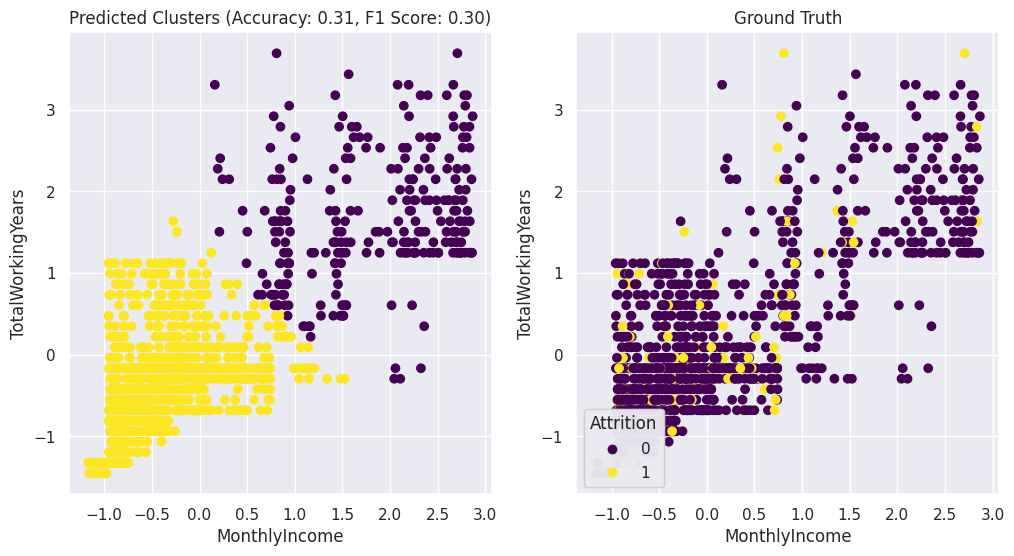

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_silhouette_pairs_std['kmeans']
X = df_one_hot[list(pair)]
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()

AGGLOMERATIVE

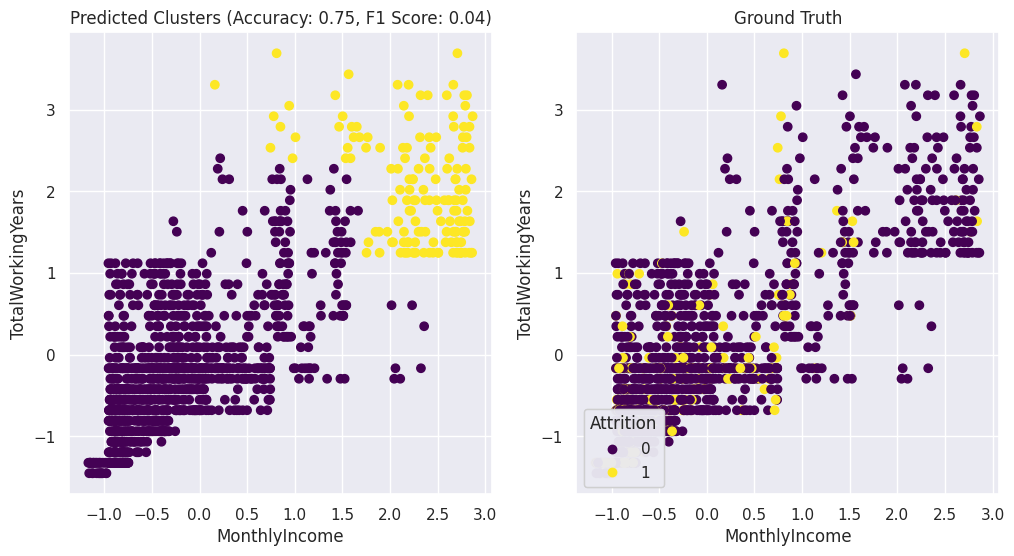

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_silhouette_pairs_std['agg']
X = df_one_hot[list(pair)]
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


GMM


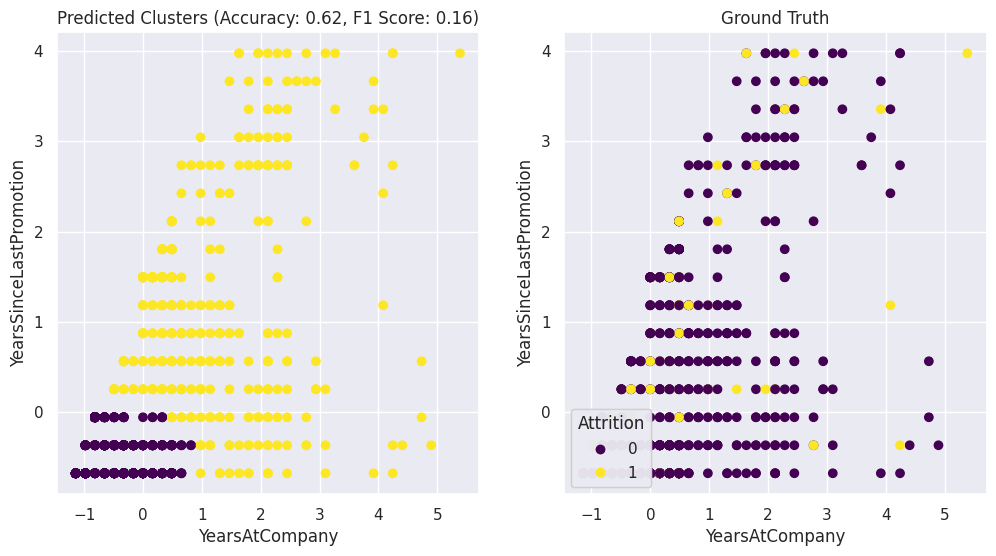

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair=best_silhouette_pairs_std['gmm']
X = df_one_hot[list(pair)]
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


**BEST CALINSKI-HARABASZ SCORES (std num attributes)**

---



---


K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


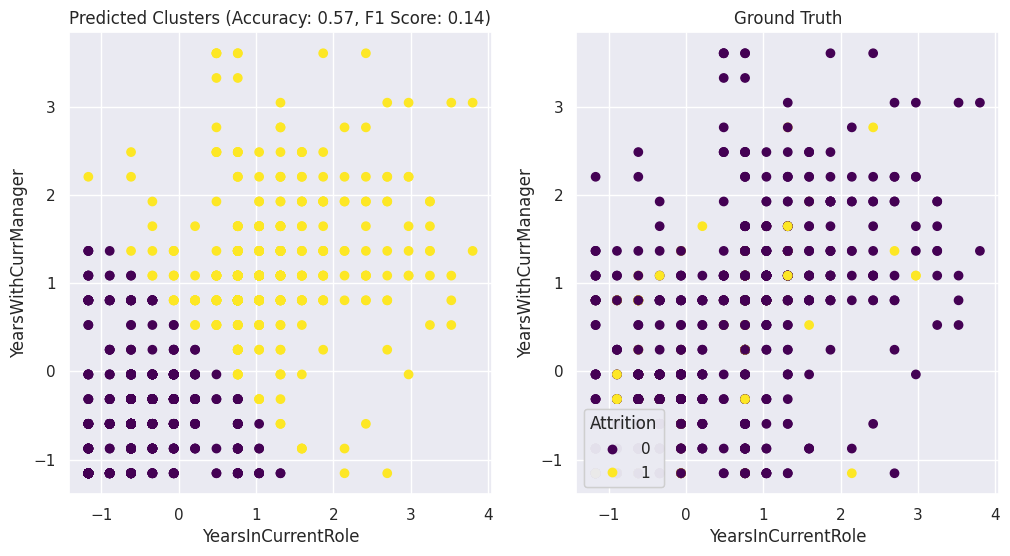

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_calinski_harabasz_pairs_std['kmeans']
X = df_one_hot[list(pair)]
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

# Calculate accuracy
y_pred = (labels == 1).astype(int)  # Assign the larger cluster to 1 and the smaller to 0
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


AGGLOMERATIVE

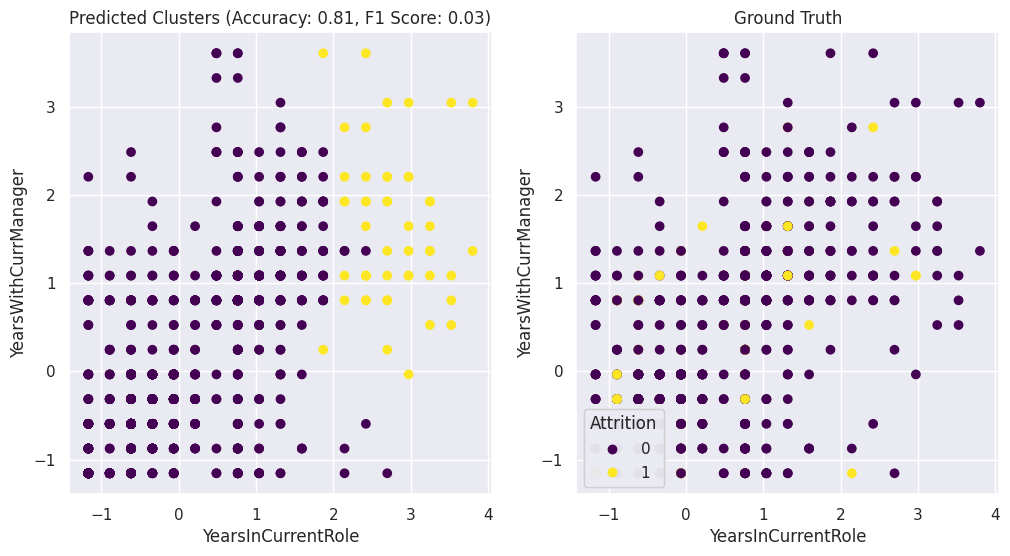

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_calinski_harabasz_pairs_std['agg']
X = df_one_hot[list(pair)]
agg = AgglomerativeClustering(n_clusters=2, linkage='average')
labels = agg.fit_predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


GMM

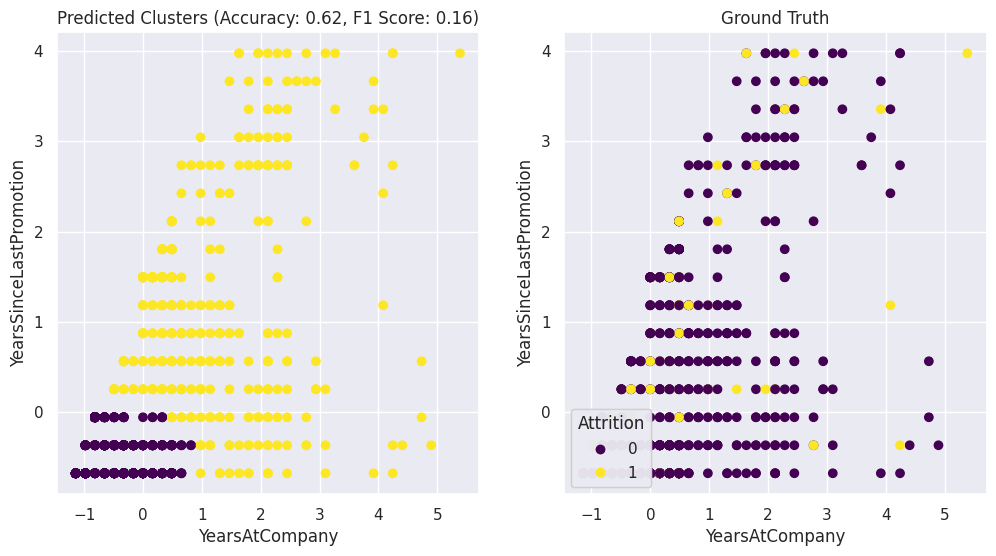

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_calinski_harabasz_pairs_std['gmm']
X = df_one_hot[list(pair)]
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


**BEST DAVIES-BOULDIN SCORES (std num attributes)**

---



---



K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


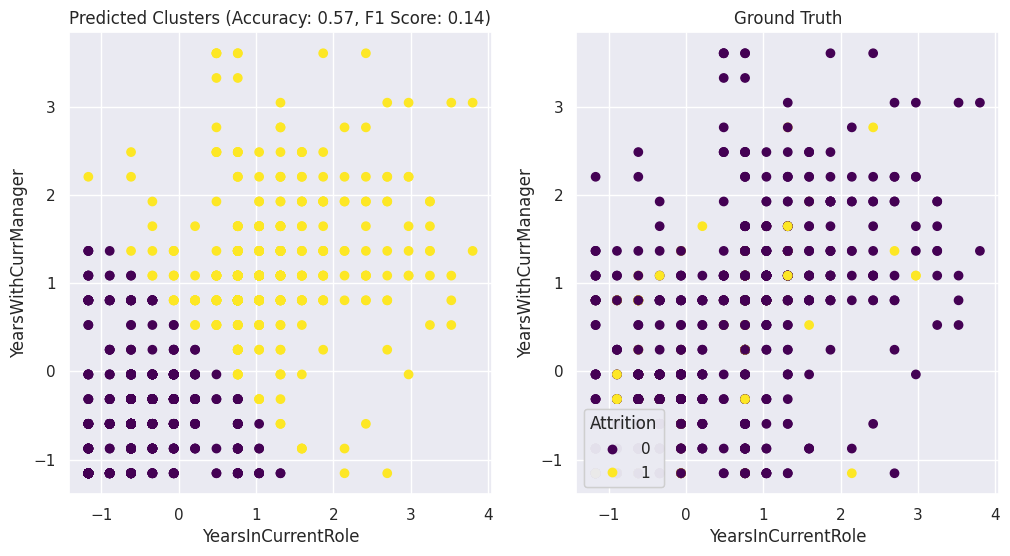

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_davies_bouldin_pairs_std['kmeans']
X = df_one_hot[list(pair)]
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


AGGLOMERATIVE

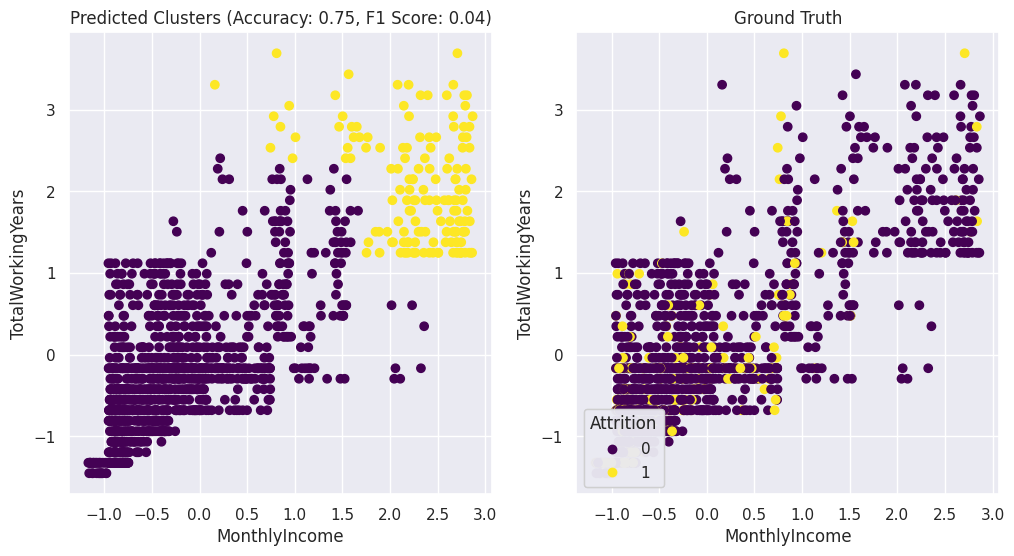

In [ ]:
# Ground truth labels
y_true = df_one_hot['Attrition']

# Predicted cluster labels
pair = best_davies_bouldin_pairs_std['agg']
X = df_one_hot[list(pair)]
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


In [ ]:
attribute_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create a list of all pairs of columns to test
pairs = list(itertools.combinations(attribute_list, 2))

# Initialize variables to hold the best scores and attribute pairs
best_silhouette_pairs = {'kmeans': None, 'agg': None, 'gmm': None}
best_silhouette_scores = {'kmeans': -1, 'agg': -1, 'gmm': -1}
best_calinski_harabasz_pairs = {'kmeans': None, 'agg': None, 'gmm': None}
best_calinski_harabasz_scores = {'kmeans': -1, 'agg': -1, 'gmm': -1}
best_davies_bouldin_pairs = {'kmeans': None, 'agg': None, 'gmm': None}
best_davies_bouldin_scores = {'kmeans': float("inf"), 'agg': float("inf"), 'gmm': float("inf")}

# Loop through all pairs and calculate scores
for pair in pairs:
    X = new_df[list(pair)]#df_one_hot

    # KMeans Clustering
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    kmeans_labels = kmeans.labels_

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=2).fit(X)
    agg_labels = agg.labels_

    # GMM Clustering
    gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
    gmm_labels = gmm.predict(X)

    # Calculate scores for each algorithm
    silhouette_kmeans = silhouette_score(X, kmeans_labels)
    silhouette_agg = silhouette_score(X, agg_labels)
    silhouette_gmm = silhouette_score(X, gmm_labels)

    calinski_harabasz_kmeans = calinski_harabasz_score(X, kmeans_labels)
    calinski_harabasz_agg = calinski_harabasz_score(X, agg_labels)
    calinski_harabasz_gmm = calinski_harabasz_score(X, gmm_labels)

    davies_bouldin_kmeans = davies_bouldin_score(X, kmeans_labels)
    davies_bouldin_agg = davies_bouldin_score(X, agg_labels)
    davies_bouldin_gmm = davies_bouldin_score(X, gmm_labels)

    # Update best scores and attribute pairs for each algorithm
    if silhouette_kmeans > best_silhouette_scores['kmeans']:
        best_silhouette_scores['kmeans'] = silhouette_kmeans
        best_silhouette_pairs['kmeans'] = pair

    if calinski_harabasz_kmeans > best_calinski_harabasz_scores['kmeans']:
        best_calinski_harabasz_scores['kmeans'] = calinski_harabasz_kmeans
        best_calinski_harabasz_pairs['kmeans'] = pair

       # Update best scores and attribute pairs for KMeans algorithm
    if davies_bouldin_kmeans < best_davies_bouldin_scores['kmeans']:
        best_davies_bouldin_scores['kmeans'] = davies_bouldin_kmeans
        best_davies_bouldin_pairs['kmeans'] = pair

    # Update best scores and attribute pairs for Agglomerative Clustering algorithm
    if silhouette_agg > best_silhouette_scores['agg']:
        best_silhouette_scores['agg'] = silhouette_agg
        best_silhouette_pairs['agg'] = pair

    if calinski_harabasz_agg > best_calinski_harabasz_scores['agg']:
        best_calinski_harabasz_scores['agg'] = calinski_harabasz_agg
        best_calinski_harabasz_pairs['agg'] = pair

    if davies_bouldin_agg < best_davies_bouldin_scores['agg']:
        best_davies_bouldin_scores['agg'] = davies_bouldin_agg
        best_davies_bouldin_pairs['agg'] = pair

    # Update best scores and attribute pairs for GMM algorithm
    if silhouette_gmm > best_silhouette_scores['gmm']:
        best_silhouette_scores['gmm'] = silhouette_gmm
        best_silhouette_pairs['gmm'] = pair

    if calinski_harabasz_gmm > best_calinski_harabasz_scores['gmm']:
        best_calinski_harabasz_scores['gmm'] = calinski_harabasz_gmm
        best_calinski_harabasz_pairs['gmm'] = pair

    if davies_bouldin_gmm < best_davies_bouldin_scores['gmm']:
        best_davies_bouldin_scores['gmm'] = davies_bouldin_gmm
        best_davies_bouldin_pairs['gmm'] = pair

print("Best Silhouette Scores:")
print("KMeans: ", best_silhouette_scores['kmeans'], "for attributes", best_silhouette_pairs['kmeans'])
print("Agglomerative Clustering: ", best_silhouette_scores['agg'], "for attributes", best_silhouette_pairs['agg'])
print("GMM: ", best_silhouette_scores['gmm'], "for attributes", best_silhouette_pairs['gmm'])

print("Best Calinski-Harabasz Scores:")
print("KMeans: ", best_calinski_harabasz_scores['kmeans'], "for attributes", best_calinski_harabasz_pairs['kmeans'])
print("Agglomerative Clustering: ", best_calinski_harabasz_scores['agg'], "for attributes", best_calinski_harabasz_pairs['agg'])
print("GMM: ", best_calinski_harabasz_scores['gmm'], "for attributes", best_calinski_harabasz_pairs['gmm'])

print("Best Davies-Bouldin Scores:")
print("KMeans: ", best_davies_bouldin_scores['kmeans'], "for attributes", best_davies_bouldin_pairs['kmeans'])
print("Agglomerative Clustering: ", best_davies_bouldin_scores['agg'], "for attributes", best_davies_bouldin_pairs['agg'])
print("GMM: ", best_davies_bouldin_scores['gmm'], "for attributes", best_davies_bouldin_pairs['gmm'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Best Silhouette Scores:
KMeans:  0.7079814363371862 for attributes ('MonthlyIncome', 'NumCompaniesWorked')
Agglomerative Clustering:  0.7079810621919209 for attributes ('MonthlyIncome', 'YearsSinceLastPromotion')
GMM:  0.6816849210008012 for attributes ('MonthlyIncome', 'PercentSalaryHike')
Best Calinski-Harabasz Scores:
KMeans:  4557.699584814114 for attributes ('MonthlyRate', 'NumCompaniesWorked')
Agglomerative Clustering:  4459.609326670578 for attributes ('DailyRate', 'YearsWithCurrManager')
GMM:  4556.823061032582 for attributes ('MonthlyRate', 'YearsWithCurrManager')
Best Davies-Bouldin Scores:
KMeans:  0.4894599369026216 for attributes ('MonthlyRate', 'NumCompaniesWorked')
Agglomerative Clustering:  0.48415081584694925 for attributes ('DailyRate', 'YearsAtCompany')
GMM:  0.48958663466549857 for attributes ('MonthlyRate', 'YearsWithCurrManager')


**BEST SILHOUETTE SCORES**

---



---



K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


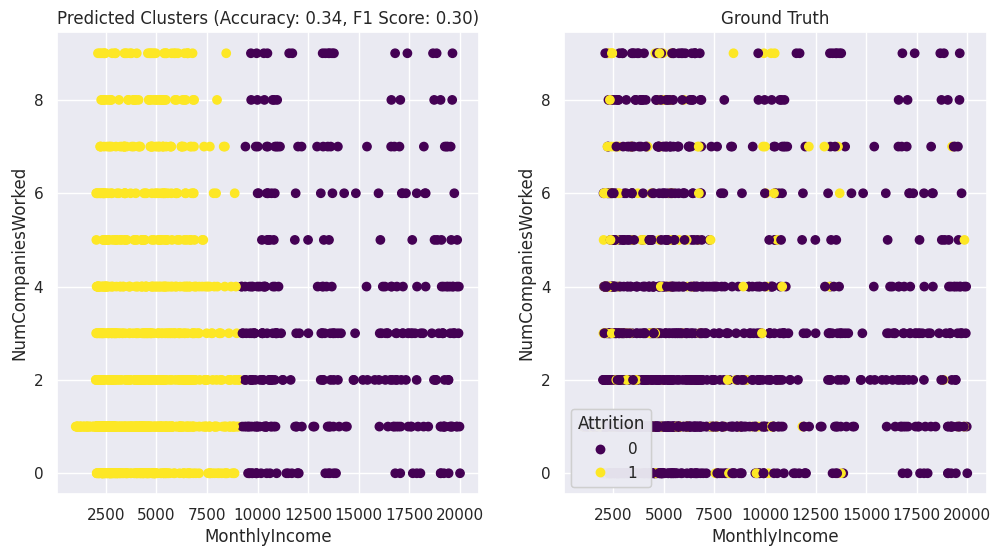

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair = best_silhouette_pairs['kmeans']
X = new_df[list(pair)]
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


AGGLOMERATIVE

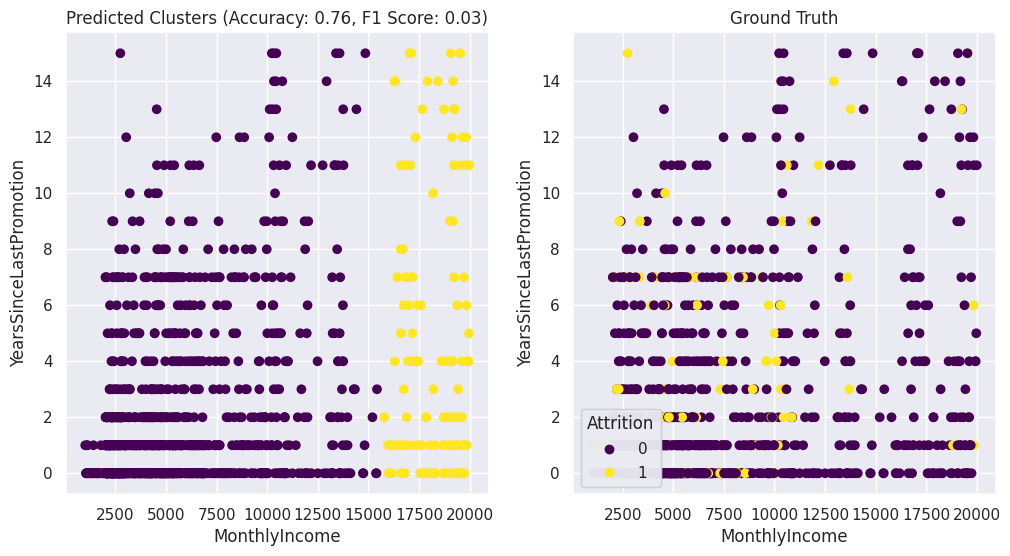

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair=best_silhouette_pairs['agg']
X = new_df[list(pair)]
agg = AgglomerativeClustering(n_clusters=2, linkage = 'single')
labels = agg.fit_predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


GMM

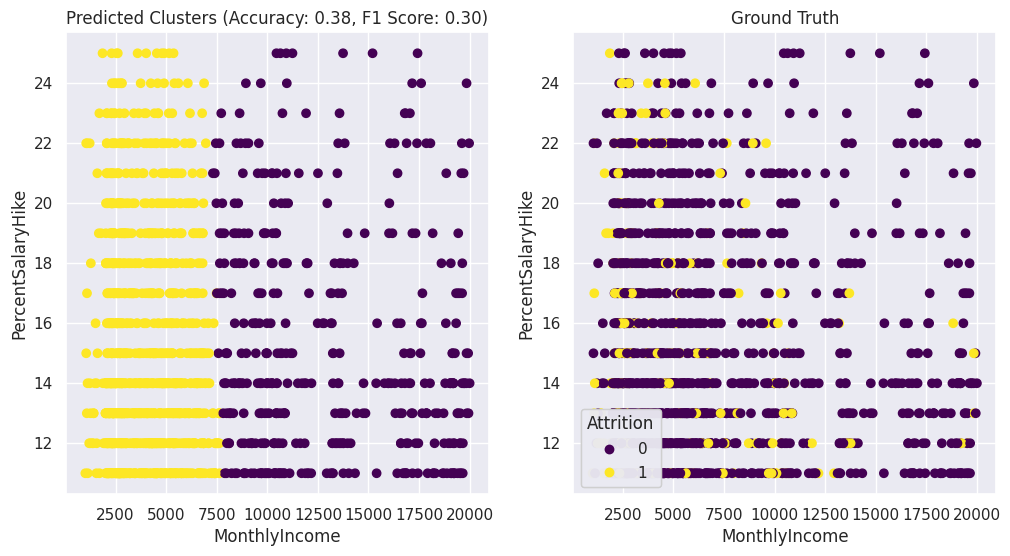

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair=best_silhouette_pairs['gmm']
X = new_df[list(pair)]
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


**BEST CALINSKI-HARABASZ SCORES**

---



---



K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


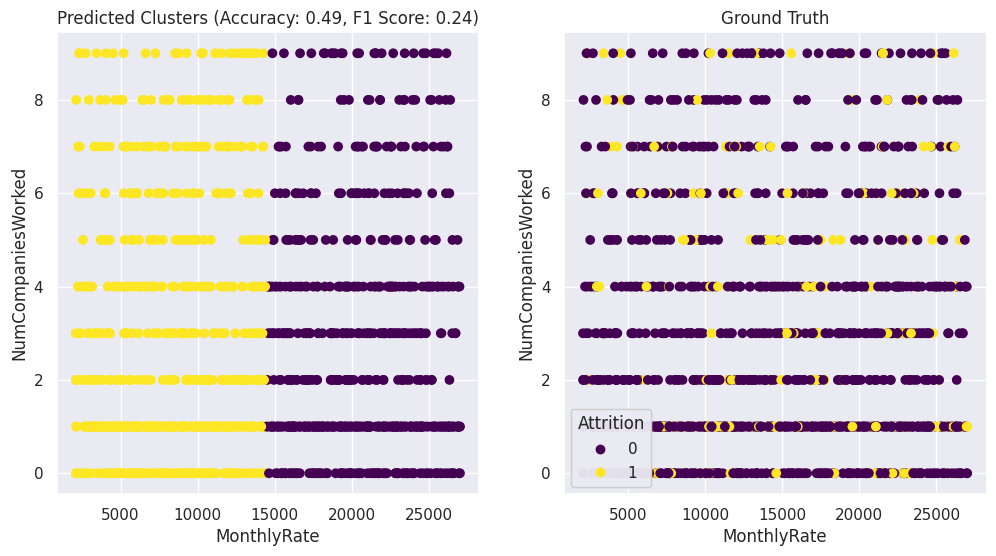

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair=best_calinski_harabasz_pairs['kmeans']
X = new_df[list(pair)]
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


AGGLOMERATIVE

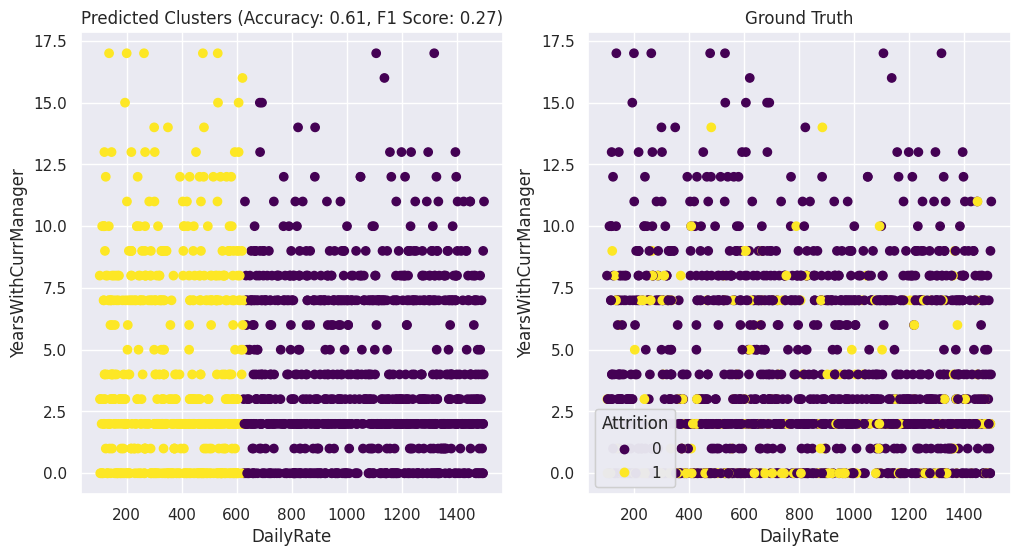

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair=best_calinski_harabasz_pairs['agg']
X = new_df[list(pair)]
agg = AgglomerativeClustering(n_clusters=2, linkage = 'average')
labels = agg.fit_predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


GMM

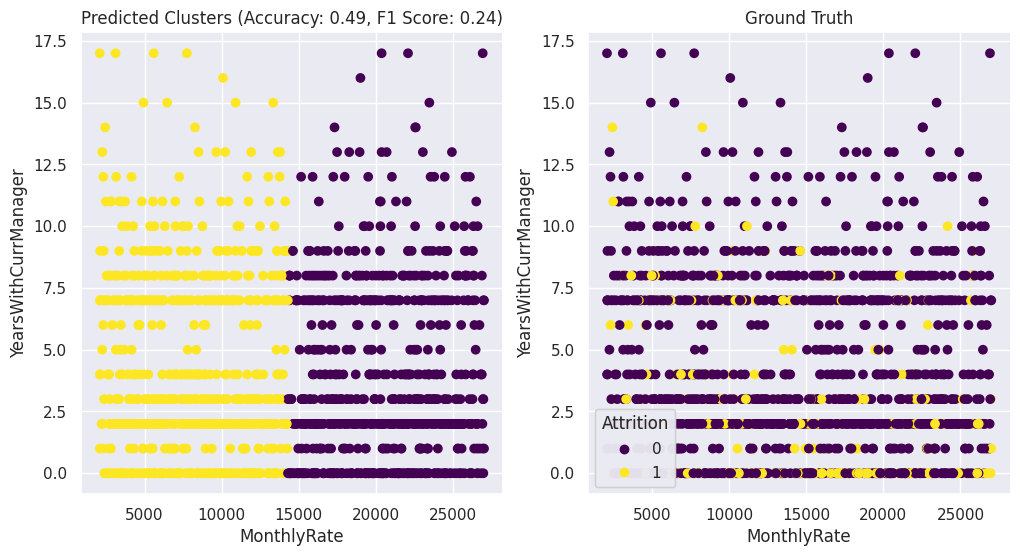

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair=best_calinski_harabasz_pairs['gmm']
X = new_df[list(pair)]
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


BEST DAVIES-BOULDIN SCORES

---



---



K-MEANS: SAME AS PREVIOUS

AGGLOMERATIVE

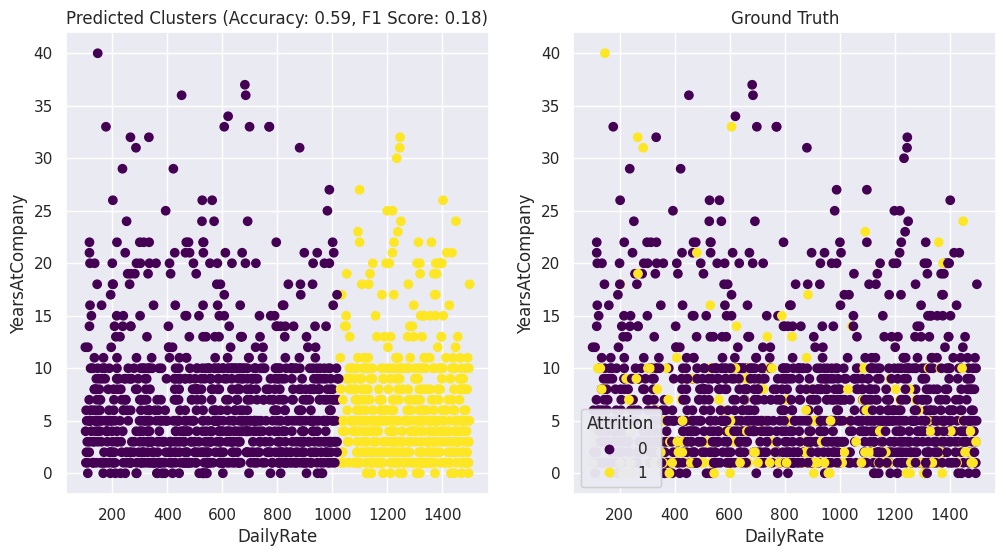

In [ ]:
# Ground truth labels
y_true = (new_df['Attrition'] == 'Yes').astype(int)  # Convert 'Yes' to 1, 'No' to 0

# Predicted cluster labels
pair=best_davies_bouldin_pairs['agg']
X = new_df[list(pair)]
agg = AgglomerativeClustering(n_clusters=2 ) #linkage = 'ward'
labels = agg.fit_predict(X)

# Calculate accuracy
y_pred = labels  # Use predicted cluster labels as predicted classes
accuracy = accuracy_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, labels)

# Plot the clusters
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# Plot predicted clusters
ax1.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
ax1.set_xlabel(pair[0])
ax1.set_ylabel(pair[1])
ax1.set_title(f'Predicted Clusters (Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f})')

# Plot true clusters
scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_true, cmap='viridis')
legend = ax2.legend(*scatter.legend_elements(),
                    loc="lower left", title="Attrition")
ax2.add_artist(legend)
ax2.set_xlabel(pair[0])
ax2.set_ylabel(pair[1])
ax2.set_title('Ground Truth')

plt.show()


GMM: SAME AS ABOVE

**NEURAL NETWORK**

---



---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, recall_score

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

# Train the model with the EarlyStopping callback
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Compute the F1 score and recall
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Test F1 score: {f1:.4f}')
print(f'Test recall: {recall:.4f}')


Epoch 1/10
37/37 [==============================] - 1s 11ms/step - loss: 0.6880 - accuracy: 0.5799 - val_loss: 0.4771 - val_accuracy: 0.8401
Epoch 2/10
37/37 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8367 - val_loss: 0.3909 - val_accuracy: 0.8401
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8384 - val_loss: 0.3675 - val_accuracy: 0.8401
Epoch 4/10
37/37 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.8478 - val_loss: 0.3482 - val_accuracy: 0.8605
Epoch 5/10
37/37 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.8656 - val_loss: 0.3340 - val_accuracy: 0.8605
Epoch 6/10
37/37 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.8869 - val_loss: 0.3183 - val_accuracy: 0.8571
Epoch 7/10
37/37 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.8988 - val_loss: 0.3084 - val_accuracy: 0.8639
Epoch 8/10
37/37 [=

10/10 [==============================] - 0s 2ms/step


<Figure size 1000x1000 with 0 Axes>

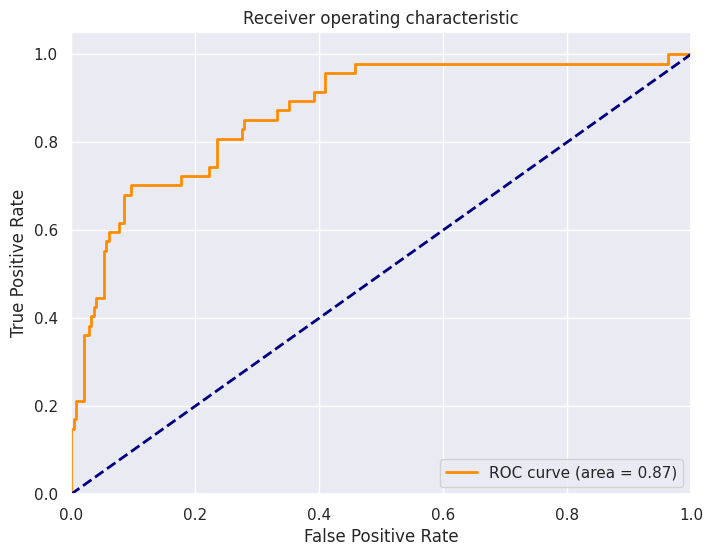

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = model.predict(X_test)

# Compute the false positive rate (fpr), true positive rate (tpr), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Set the plot size as 10 by 10
plt.figure(figsize=(10, 10))
# set the figure size
plt.figure(figsize=(8, 6))
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Store the classification reports in a dictionary
class_reports = {
    'lr_smote': lr_smote_metrics,
    'dt_smote': dt_smote_metrics,
    'rf_smote': rf_smote_metrics,
    'gb_smote': gb_smote_metrics,
    'xgb_smote': xgb_smote_metrics,
    'lr_pca_smote': lr_pca_smote_metrics,
    'dt_pca_smote': dt_pca_smote_metrics,
    'rf_pca_smote': rf_pca_smote_metrics,
    'gb_pca_smote': gb_pca_smote_metrics,
    'xgb_pca_smote': xgb_pca_smote_metrics,
    'lr': lr_metrics,
    'dt': dt_metrics,
    'rf': rf_metrics,
    'gb': gb_metrics,
    'xgb': xgb_metrics,
    'lr_pca': lr_pca_metrics,
    'dt_pca': dt_pca_metrics,
    'rf_pca': rf_pca_metrics,
    'gb_pca': gb_pca_metrics,
    'xgb_pca': xgb_pca_metrics,
    'neural_net': classification_report(y_test, y_pred)
}

# Create an empty dataframe
comp_df = pd.DataFrame(columns=['model', 'class_label', 'precision', 'recall', 'f1-score', 'support'])

# Iterate through the dictionary and append the metrics to the dataframe
for model, report in class_reports.items():
    # Split the report by line breaks to get individual lines
    lines = report.split('\n')

    # Extract the metrics for each class
    class_metrics = lines[2:-5]  # Exclude the last two lines that contain averages

    for metric_line in class_metrics:
        # Split each line by whitespace and extract the desired metrics
        metric_values = metric_line.split()
        class_label = int(metric_values[0])
        precision = float(metric_values[1])
        recall = float(metric_values[2])
        f1_score = float(metric_values[3])
        support = int(metric_values[4])

        # Append the metrics to the dataframe
        row = pd.DataFrame({
            'model': [model],
            'class_label': [class_label],
            'precision': [precision],
            'recall': [recall],
            'f1-score': [f1_score],
            'support': [support]
        })
        comp_df = pd.concat([comp_df, row], ignore_index=True)

# Pivot the dataframe to have separate columns for class_label = 0 and class_label = 1
comp_df_pivot = comp_df.pivot(index='model', columns='class_label')

# Rename the columns to include the metric names
comp_df_pivot.columns = [f"{col[0]}_{col[1]}" for col in comp_df_pivot.columns]

# Reset the index
comp_df_pivot.reset_index(inplace=True)




In [ ]:
sorted_df = comp_df_pivot.sort_values(by='precision_1', ascending=False)
sorted_df.head(20)


model  precision_0  precision_1  recall_0  recall_1  f1-score_0  \
18        xgb_pca         0.87         0.75      0.98      0.26        0.93   
8              lr         0.90         0.71      0.96      0.47        0.93   
9          lr_pca         0.90         0.71      0.96      0.47        0.93   
13             rf         0.85         0.71      0.99      0.11        0.92   
11       lr_smote         0.91         0.70      0.96      0.49        0.93   
12     neural_net         0.90         0.69      0.96      0.43        0.93   
14         rf_pca         0.85         0.67      1.00      0.04        0.91   
17            xgb         0.87         0.61      0.97      0.23        0.92   
7        gb_smote         0.88         0.58      0.96      0.32        0.92   
4              gb         0.86         0.57      0.98      0.17        0.91   
10   lr_pca_smote         0.90         0.55      0.93      0.47        0.91   
15   rf_pca_smote         0.88         0.54      0.95      0.30        0.91   
20      xgb_smote         0.88         0.54      0.95      0.30        0.91   
5          gb_pca         0.86         0.50      0.96      0.19        0.91   
19  xgb_pca_smote         0.89         0.49      0.92      0.38        0.90   
1          dt_pca         0.88         0.43      0.92      0.32        0.90   
6    gb_pca_smote         0.89         0.43      0.90      0.40        0.89   
16       rf_smote         0.90         0.43      0.87      0.49        0.89   
3        dt_smote         0.90         0.42      0.87      0.49        0.88   
0              dt         0.88         0.40      0.90      0.36        0.89   

    f1-score_1 support_0 support_1  
18        0.38       247        47  
8         0.56       247        47  
9         0.56       247        47  
13        0.19       247        47  
11        0.57       247        47  
12        0.53       247        47  
14        0.08       247        47  
17        0.34       247        47  
7         0.41       247        47  
4         0.26       247        47  
10        0.51       247        47  
15        0.38       247        47  
20        0.38       247        47  
5         0.28       247        47  
19        0.43       247        47  
1         0.37       247        47  
6         0.42       247        47  
16        0.46       247        47  
3         0.45       247        47  
0         0.38       247        47

**REPORT**

---



---



**INTRODUCTION**
The choice of an employee attrition dataset for data mining is valuable for organizations as it helps identify key factors contributing to turnover. Analyzing attributes like job satisfaction, compensation, work-life balance, and demographics enables pinpointing influential factors. Predictive modeling using historical data allows organizations to forecast attrition and take proactive measures. Additionally, analyzing employee attrition data aids in developing effective retention strategies, tailoring HR policies, programs, and initiatives to address specific areas like job satisfaction. This can improve workplace culture, provide career development opportunities, and revise compensation plans, ultimately enhancing employee retention.

**CHALLENGE & CHOICE TO OVERCOME IT**
Class imbalance is a challenge that can occur in an employee attrition dataset, where one class (attrition) dominates the other, making it difficult to build accurate predictive models. To address this challenge, the Synthetic Minority Over-sampling Technique (SMOTE) is commonly used. SMOTE generates synthetic samples of the minority class by interpolating between neighboring instances. This technique helps balance the class distribution and provides a more representative dataset for model training.

While SMOTE is a widely used technique for addressing class imbalance, it is important to note that it may not always be the optimal choice for every situation. Because of limited time we couldn't proceed to trying all the potentially better methods.

**METHODOLOGY**

---



---



**Data quality check:**
 We performed check for missing values in the dataset.


**Exploratory Data Analysis (EDA):**
We examined the shape of the dataset.
Also, inspected the data types of each column.
Moreover, calculated basic descriptive statistics.
Lastly we plotted histograms for numerical features,
Creating separate histograms for the 'Attrition' attribute.


**Data preprocessing:**
We identified and dropped irrelevant columns,
scaled numerical attributes.
**Correlation analysis:**
Then. created a correlation matrix.
Plot a heatmap visualization.
Identify the highest correlation value and corresponding attribute names.


**One-hot encoding:**
Encoded categorical attributes.
Converted the 'Attrition' column to binary values.


**Separate features and target variable:**
Divided the dataset into independent attributes (X) and the target variable (y).

**MODEL TRAINING AND EVALUATION**

---



---



For the sake of completeness we provide a short description of models we trained using the Augmented Data (SMOTE). Iteratevely we trained the same models using 1. SMOTE with PCA,Non-Augmented (Original data), Non-Augmented with PCA.


1.Logistic Regression
2.Decision Tree
3.Random Forest
4.Gradient Boosting
5.XGBoost Classifier
6.AdaBoost

**CLUSTERING**

---



---



Additionally, we performed Correlation analysis, where we calculated the correlation between each attribute and the target variable 'Attrition'.  From the above, we selected the 10 most correlated features and draw a hierarchical clustering using complete linkage. The knowledge derived from it can be utilized in feature selection for further experimentation.

Moreover, in an exploratory spirit we have conducted extensive Clustering Analysis for the best attribute pair (searching through numerical attributes only) and clustering algorithm (K-means, AgglomerativeClustering, and GMM) and for each pair of attribut and clustering algorithm we check the following scores: Silhouette, Calinski-Harabasz and Davies-Bouldin. The attribute pairs with the best scores are stored.

For the best attribute pair and clustering algorithm the predicted cluster labels are obtained. Based on the provided in the dataset ground truth labels we calculated the Accuracy and F1 scores.

As you can observe, we obtained very poor results. Something we should be aware of since the dataset is highly imbalanced.

**CONCLUSION**

---



---



From the above table we evaluate the performance of models (for an imbalanced dataset) based on precision_1 = 0.7, recall_1 = 0.49 and f-1score_1 = 0.57. The best performing model is Logistic Regression on Augmented Data (SMOTE). ROCcurve and Confusion matrix is below

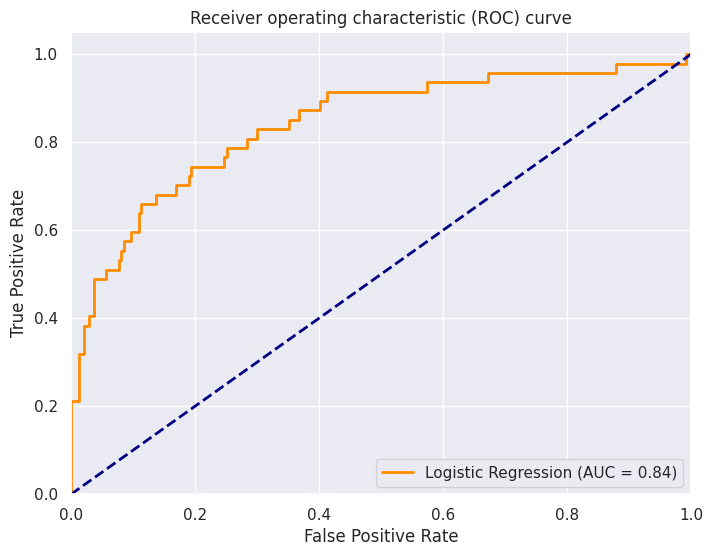

In [ ]:

# get predicted probabilities for positive class
y_score_lr_smote = lr_smote.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score_lr_smote)

# calculate AUC score
roc_auc = auc(fpr, tpr)
# set the figure size
plt.figure(figsize=(8, 6))
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


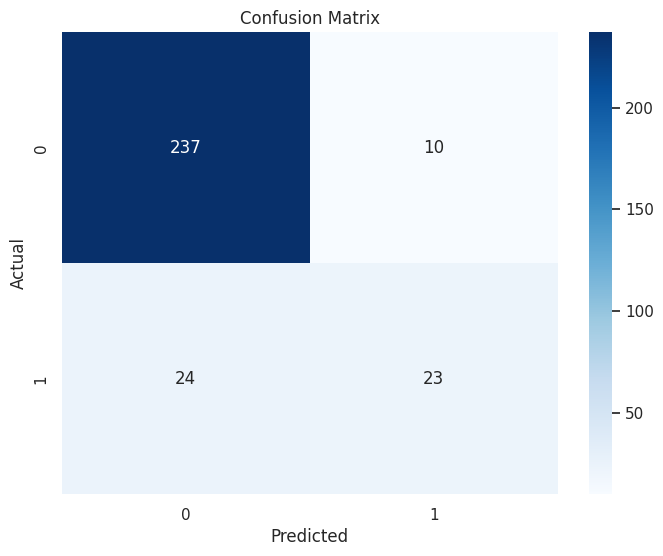

In [ ]:

# get predicted labels
y_pred_lr_smote = lr_smote.predict(X_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr_smote)
# set the figure size
plt.figure(figsize=(8, 6))
# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

